<a href="https://colab.research.google.com/github/Halffancyy/NLP/blob/main/ABSA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ABSA Project**
Group 40: Shijun Shao 23926903, Jiaheng Gu 23925667, Chen Shen 23877677


# 1. Downloading and Loading Data


## 1.1 Downloading the Dataset

To begin, we need to download the dataset used for our Aspect-Based Sentiment Analysis (ABSA) project. We downloaded and put the dataset on our github so that we can input them easily.

In [133]:
# Download from Github

!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/test.json
!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/train.json
!wget https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/val.json
!ls

--2024-05-20 10:31:07--  https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/test.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141274 (138K) [text/plain]
Saving to: ‘test.json.2’

test.json.2         100%[===================>] 137.96K  --.-KB/s    in 0.04s   

2024-05-20 10:31:07 (3.82 MB/s) - ‘test.json.2’ saved [141274/141274]

--2024-05-20 10:31:07--  https://raw.githubusercontent.com/jerryshenfewcher/Cits4012/main/train.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1136800 (1.1M) [text/plain]
Saving

## 1.2 Loading the Dataset

Once the dataset is downloaded, we proceed to load it into our environment for preprocessing and analysis. The data loading process involves reading the dataset files and organizing them into a suitable structure for further processing.


In [134]:
import json
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1.3 Exploring the Dataset
Exploring the dataset helps us understand its structure and the distribution of the data. Here, we examine the first few entries of each part of the dataset to get an overview of the data we will be working with.

In [135]:
def fileopen(file):
  with open(file, 'r') as f:
    data = json.load(f)
    return data

test_data = fileopen('test.json')
train_data = fileopen('train.json')
val_data = fileopen('val.json')

print(test_data)
print(train_data)
print(val_data)

{'columns': ['sentence', 'aspect', 'polarity'], 'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 21

# 2. Data Preprocessing

## 2.1 Handling Contractions
To handle contractions in the text data, we use a predefined dictionary to replace common contractions with their expanded forms. This step is crucial for ensuring that the text data is uniform and easier to process.

Preprocessing the data involves several steps:
Lowercasing: Converting all text to lowercase to ensure uniformity.
Handling Contractions: Replacing contractions with their expanded forms.
Removing Punctuation: Removing all punctuation to simplify the text.
Tokenization: Splitting the text into individual words (tokens).

The data is split into training, validation, and test sets. This ensures that we have separate data for training the model, validating its performance during training, and testing its final performance on unseen data.

We add special tokens <BOS> (beginning of sequence) and <EOS> (end of sequence) to the polarity lists. These tokens help the model understand the sequence boundaries during training.

In [136]:
# These are just common English contractions.
contraction_dict = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have",
    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would",
    "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have",
    "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am",
    "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
    "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
    "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
    "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as",
    "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is",
    "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is",
    "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
    "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are",
    "you've": "you have"
}

def pre_process(data):
    output = []
    for sent_list in data["data"]:
        sent = sent_list[0].lower()  # Assuming the first element is the sentence
        for word, new_word in contraction_dict.items():
            sent = sent.replace(word, new_word)  # Dealing with contractions
        sent = re.sub(r'[^\w\s]', '', sent)  # Removing punctuation
        tokens = word_tokenize(sent)  # Tokenization
        aspect = sent_list[1]
        polarity = sent_list[2]
        output.append([tokens, [aspect], [polarity]])
    return output

# Preprocess the data
train_token_list = pre_process(train_data)
test_token_list = pre_process(test_data)
val_token_list = pre_process(val_data)

# Split the data
train_token_list, train_aspect_list, train_polarity_list = zip(*train_token_list)
test_token_list, test_aspect_list, test_polarity_list = zip(*test_token_list)
val_token_list, val_aspect_list, val_polarity_list = zip(*val_token_list)

train_token_list = list(train_token_list)
train_aspect_list = list(train_aspect_list)
train_polarity_list = list(train_polarity_list)

test_token_list = list(test_token_list)
test_aspect_list = list(test_aspect_list)
test_polarity_list = list(test_polarity_list)

val_token_list = list(val_token_list)
val_aspect_list = list(val_aspect_list)
val_polarity_list = list(val_polarity_list)

# Add special tokens
output_test_polarity_list = [["<BOS>"] + s for s in test_polarity_list]
target_test_polarity_list = [s + ["<EOS>"] for s in test_polarity_list]

output_train_polarity_list = [["<BOS>"] + s for s in train_polarity_list]
target_train_polarity_list = [s + ["<EOS>"] for s in train_polarity_list]

output_val_polarity_list = [["<BOS>"] + s for s in val_polarity_list]
target_val_polarity_list = [s + ["<EOS>"] for s in val_polarity_list]

print(output_test_polarity_list[0])

['<BOS>', 'neutral']


## 2.2 Creating the Vocabulary
We use a pre-trained GloVe model to create a vocabulary-to-index dictionary. This dictionary maps each word to a unique index, which will be used as input to our model.

In [137]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
word2vec_model = api.load('glove-wiki-gigaword-100')  # Using a smaller GloVe model with 100 dimensions

# Create a vocabulary-to-index dictionary and limit the vocabulary size
word_to_ix = {"<BOS>": 0, "<EOS>": 1, "<PAD>": 2, "<UNK>": 3}
embedding_dim = word2vec_model.vector_size

# Add words from the Word2Vec model to the vocabulary, limiting to 50000 words
for word in word2vec_model.index_to_key:
    if word not in word_to_ix:
        word_to_ix[word] = len(word_to_ix)
    if len(word_to_ix) >= 50000:  # Limit vocabulary size to 50000
        break

# Add unseen words from the training and testing data to the vocabulary
for sentence in train_token_list + test_token_list + output_train_polarity_list + output_test_polarity_list:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)

# Ensure special tokens '<UNK>' and '<PAD>' are added to the vocabulary
word_to_ix.setdefault('<UNK>', len(word_to_ix))
word_to_ix.setdefault('<PAD>', len(word_to_ix) + 1)


2

## 2.2 Converting Text Data to Indices
We convert the text data to indices using the created vocabulary-to-index dictionary. This step transforms the text data into numerical format, which can be processed by the model.

In [138]:
def to_index(data, to_ix):
    """Convert text data to index using the given vocabulary index map."""
    index_list = []
    for sent in data:
        index_list.append([to_ix.get(w, to_ix['<UNK>']) for w in sent])
    return index_list

# Ensure special tokens '<UNK>' and '<PAD>' are added to the dictionary
word_to_ix.setdefault('<UNK>', len(word_to_ix))
word_to_ix.setdefault('<PAD>', len(word_to_ix) + 1)

# Convert training data to indices
input_index = to_index(train_token_list, word_to_ix)
output_index = to_index(output_train_polarity_list, word_to_ix)
target_index = to_index(target_train_polarity_list, word_to_ix)

# Print results to verify conversion
print("Training Input Indices (first 3):", input_index[:3])
print("Training Output Indices (first 3):", output_index[:3])
print("Training Target Indices (first 3):", target_index[:3])

# Convert test data to indices
test_input_index = to_index(test_token_list, word_to_ix)
test_output_index = to_index(output_test_polarity_list, word_to_ix)
test_target_index = to_index(target_test_polarity_list, word_to_ix)

# Print test data indices to verify conversion
print("Test Input Indices (first 3):", test_input_index[:3])
print("Test Output Indices (first 3):", test_output_index[:3])
print("Test Target Indices (first 3):", test_target_index[:3])

# Print the first five elements of the training polarity list to understand the data structure
print("train_polarity_list (first 5 elements):")
for i in range(min(5, len(train_polarity_list))):
    print(f"Element {i}: {train_polarity_list[i]}")

# Verify if there are any indices that are out of the expected range (greater than vocab_size)
vocab_size = len(word_to_ix)
for idx_list in input_index + test_input_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in input data.")
        break

for idx_list in output_index + test_output_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in output data.")
        break

for idx_list in target_index + test_target_index:
    if any(idx >= vocab_size for idx in idx_list):
        print("Found index out of range in target data.")
        break

Training Input Indices (first 3): [[24, 418, 34, 4, 258, 3166, 139, 569, 45, 37, 44, 10, 4, 241, 104, 87, 85, 36, 226, 8, 4, 14832, 3945, 4350, 50, 4, 2641, 24, 98, 34, 124, 4, 245, 14, 85], [24, 418, 34, 4, 258, 3166, 139, 569, 45, 37, 44, 10, 4, 241, 104, 87, 85, 36, 226, 8, 4, 14832, 3945, 4350, 50, 4, 2641, 24, 98, 34, 124, 4, 245, 14, 85], [23785, 19, 2712, 23605, 65, 57, 1153, 33, 1156, 203, 14, 166, 9458]]
Training Output Indices (first 3): [[0, 1339], [0, 5880], [0, 1339]]
Training Target Indices (first 3): [[1339, 1], [5880, 1], [1339, 1]]
Test Input Indices (first 3): [[57, 392, 382, 9, 3227, 26, 4, 2073, 41, 83, 45, 44, 426, 44171, 7, 13529, 9, 40, 52, 25261, 45, 1302, 11, 7987, 7, 10956, 6823, 9, 67, 39, 63, 426, 10, 4, 7987, 4, 1037, 19, 2707, 21, 26862, 4, 14038, 19, 40, 155, 18779], [57, 392, 382, 9, 3227, 26, 4, 2073, 41, 83, 45, 44, 426, 44171, 7, 13529, 9, 40, 52, 25261, 45, 1302, 11, 7987, 7, 10956, 6823, 9, 67, 39, 63, 426, 10, 4, 7987, 4, 1037, 19, 2707, 21, 26862,

## 2.3 Splitting the Dataset
We split the dataset into training, validation, and test sets. This ensures that we have separate data for training the model, validating its performance during training, and testing its final performance on unseen data.

In [139]:
# Split the dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

# Combine all data
all_token_list = train_token_list + val_token_list + test_token_list
all_aspect_list = train_aspect_list + val_aspect_list + test_aspect_list
all_polarity_list = train_polarity_list + val_polarity_list + test_polarity_list

# First split into training set and temporary set (validation set + test set)
train_tokens, temp_tokens, train_aspects, temp_aspects, train_polarities, temp_polarities = train_test_split(
    all_token_list, all_aspect_list, all_polarity_list, test_size=0.4, random_state=42
)

# Then split the temporary set into validation set and test set
val_tokens, test_tokens, val_aspects, test_aspects, val_polarities, test_polarities = train_test_split(
    temp_tokens, temp_aspects, temp_polarities, test_size=0.5, random_state=42
)

## 2.4 Creating Tensors from Text Data
To feed the text data into our model, we need to convert the sequences of words into sequences of indices, and then into tensors. We also need to handle padding and truncation to ensure all sequences have the same length.

In [140]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torch.nn.functional as F

In [141]:
def create_tensors(data_list, to_ix, max_len):
    """
    Convert text data into padded or truncated indices, then into tensors.

    Parameters:
    data_list (list of list of str): The tokenized text data.
    to_ix (dict): A dictionary mapping words to their corresponding indices.
    max_len (int): The maximum length of sequences.

    Returns:
    list of torch.Tensor: The list of tensorized sequences.
    """
    tensor_list = []
    for data in data_list:
        indexed = [to_ix.get(word, to_ix['<UNK>']) for word in data]
        indexed = indexed[:max_len]  # Truncate to max_len
        padding_length = max_len - len(indexed)
        indexed += [to_ix['<PAD>']] * padding_length  # Pad to max_len
        tensor = torch.tensor(indexed, dtype=torch.long)
        tensor_list.append(tensor)
    return tensor_list

label_mapping = {'neutral': 0, 'positive': 1, 'negative': 2}

def remap_labels(nested_labels, mapping):
    """
    Map string labels to integers using the provided mapping and convert to tensor.

    Parameters:
    nested_labels (list of list of str): The nested list of string labels.
    mapping (dict): A dictionary mapping string labels to integers.

    Returns:
    torch.Tensor: The tensor of mapped labels.
    """
    mapped_labels = [mapping[label[0]] for label in nested_labels]
    return torch.tensor(mapped_labels, dtype=torch.long)


Next, we determine the maximum sequence length to ensure consistent input size for our model:

In [142]:
# Here we simply use the maximum sentence length
max_len = max([len(s) for s in train_token_list] + [len(s) for s in target_train_polarity_list])

print(max_len)

67


## 2.5 Processing and Verifying the Data
We then process the data using the new vocabulary and verify that the lengths of each dataset are consistent.
We verify that the maximum index is within the expected range of the embedding matrix:

In [143]:
# Process the data using the new vocabulary
train_labels = remap_labels(train_polarity_list, label_mapping)
train_inputs = create_tensors(train_token_list, word_to_ix, max_len)
train_aspects = create_tensors(train_aspect_list, word_to_ix, max_len)

test_labels = remap_labels(test_polarity_list, label_mapping)
test_inputs = create_tensors(test_token_list, word_to_ix, max_len)
test_aspects = create_tensors(test_aspect_list, word_to_ix, max_len)

val_labels = remap_labels(val_polarity_list, label_mapping)
val_inputs = create_tensors(val_token_list, word_to_ix, max_len)
val_aspects = create_tensors(val_aspect_list, word_to_ix, max_len)

# Verify that the lengths of each dataset are consistent
assert len(train_inputs) == len(train_aspects) == len(train_labels), "Train dataset lengths are not equal!"
assert len(test_inputs) == len(test_aspects) == len(test_labels), "Test dataset lengths are not equal!"
assert len(val_inputs) == len(val_aspects) == len(val_labels), "Validation dataset lengths are not equal!"

# Print the first 5 samples for debugging
for i in range(5):
    print(f"Train Sample {i+1} - Token List: {train_token_list[i]}")
    print(f"Train Sample {i+1} - Aspect List: {train_aspect_list[i]}")
    print(f"Train Sample {i+1} - Processed Input Tensor: {train_inputs[i]}")
    print()

    print(f"Test Sample {i+1} - Token List: {test_token_list[i]}")
    print(f"Test Sample {i+1} - Aspect List: {test_aspect_list[i]}")
    print(f"Test Sample {i+1} - Processed Input Tensor: {test_inputs[i]}")
    print()

    print(f"Val Sample {i+1} - Token List: {val_token_list[i]}")
    print(f"Val Sample {i+1} - Aspect List: {val_aspect_list[i]}")
    print(f"Val Sample {i+1} - Processed Input Tensor: {val_inputs[i]}")
    print()

# Verify that the maximum index is within the expected range
max_train_input_index = max(max(seq) for seq in train_inputs)
max_test_input_index = max(max(seq) for seq in test_inputs)
max_val_input_index = max(max(seq) for seq in val_inputs)
max_train_aspect_index = max(max(seq) for seq in train_aspects)
max_test_aspect_index = max(max(seq) for seq in test_aspects)
max_val_aspect_index = max(max(seq) for seq in val_aspects)

print(f"Max train input index: {max_train_input_index}")
print(f"Max test input index: {max_test_input_index}")
print(f"Max val input index: {max_val_input_index}")
print(f"Max train aspect index: {max_train_aspect_index}")
print(f"Max test aspect index: {max_test_aspect_index}")
print(f"Max val aspect index: {max_val_aspect_index}")

if max(max_train_input_index, max_test_input_index, max_val_input_index, max_train_aspect_index, max_test_aspect_index, max_val_aspect_index) >= len(word_to_ix):
    raise ValueError("Some indices are out of the range of the embedding matrix.")

Train Sample 1 - Token List: ['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you']
Train Sample 1 - Aspect List: ['food']
Train Sample 1 - Processed Input Tensor: tensor([   24,   418,    34,     4,   258,  3166,   139,   569,    45,    37,
           44,    10,     4,   241,   104,    87,    85,    36,   226,     8,
            4, 14832,  3945,  4350,    50,     4,  2641,    24,    98,    34,
          124,     4,   245,    14,    85,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     2])

Test Sample 1 - Token List: ['we', 'went', 'again', 'and', 'sat', 'at', 'the', 'bar', 'this', 'time'

# Model

## 3.1 Print First Few Records of the Original Data
To ensure that the original data structure is consistent and properly loaded, we print the first few records of each dataset.

In [144]:
# Print the first few records of the original data to check consistency
print("First few train token list entries:", train_token_list[:5])
print("First few train aspect list entries:", train_aspect_list[:5])
print("First few train polarity list entries:", train_polarity_list[:5])

print("First few test token list entries:", test_token_list[:5])
print("First few test aspect list entries:", test_aspect_list[:5])
print("First few test polarity list entries:", test_polarity_list[:5])

print("First few val token list entries:", val_token_list[:5])
print("First few val aspect list entries:", val_aspect_list[:5])
print("First few val polarity list entries:", val_polarity_list[:5])

First few train token list entries: [['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you'], ['it', 'might', 'be', 'the', 'best', 'sit', 'down', 'food', 'i', 'have', 'had', 'in', 'the', 'area', 'so', 'if', 'you', 'are', 'going', 'to', 'the', 'upright', 'citizen', 'brigade', 'or', 'the', 'garden', 'it', 'could', 'be', 'just', 'the', 'place', 'for', 'you'], ['hostess', 'was', 'extremely', 'accommodating', 'when', 'we', 'arrived', 'an', 'hour', 'early', 'for', 'our', 'reservation'], ['hostess', 'was', 'extremely', 'accommodating', 'when', 'we', 'arrived', 'an', 'hour', 'early', 'for', 'our', 'reservation'], ['we', 'were', 'a', 'couple', 'of', 'minutes', 'late', 'for', 'our', 'reservation', 'and', 'minus', 'one', 'guest', 'but', 'we', 'did', 'not', 'think', 'we', 'deserved', 'the', 'a

## 3.2 Visualize Label Distribution
To understand the distribution of labels in the training set, we visualize it using a bar chart.

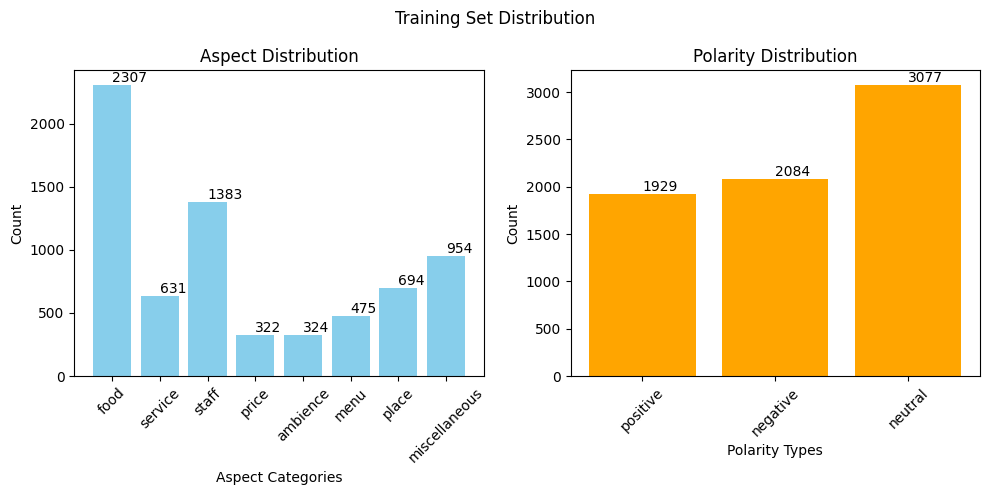

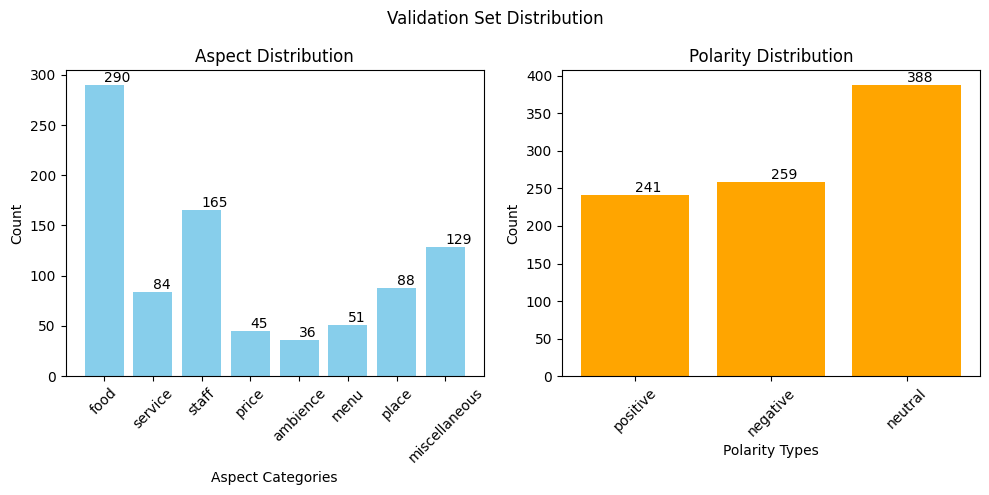

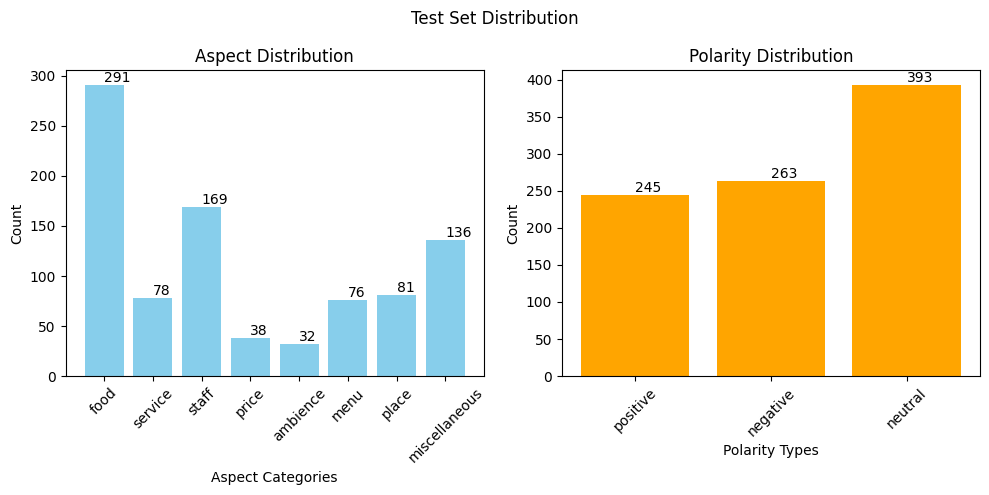

In [145]:
import matplotlib.pyplot as plt

def plot_aspect_and_polarity_distribution(aspect_lists, polarity_lists, title):
    # Define aspect categories and polarity types for counting occurrences
    aspect_counts = {
        'food': 0, 'service': 0, 'staff': 0, 'price': 0,
        'ambience': 0, 'menu': 0, 'place': 0, 'miscellaneous': 0
    }
    polarity_counts = {'positive': 0, 'negative': 0, 'neutral': 0}

    # Count occurrences of each aspect and polarity
    for aspects, polarities in zip(aspect_lists, polarity_lists):
        for aspect in aspects:
            if aspect in aspect_counts:
                aspect_counts[aspect] += 1
        for polarity in polarities:
            if polarity in polarity_counts:
                polarity_counts[polarity] += 1

    # Prepare data for plotting aspects
    aspect_labels = list(aspect_counts.keys())
    aspect_values = [aspect_counts[aspect] for aspect in aspect_labels]

    # Prepare data for plotting polarities
    polarity_labels = list(polarity_counts.keys())
    polarity_values = [polarity_counts[polarity] for polarity in polarity_labels]

    # Set up the plot with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot aspect distribution
    bars1 = ax1.bar(aspect_labels, aspect_values, color='skyblue')
    ax1.set_xlabel('Aspect Categories')
    ax1.set_ylabel('Count')
    ax1.set_title('Aspect Distribution')
    ax1.set_xticks(np.arange(len(aspect_labels)))
    ax1.set_xticklabels(aspect_labels, rotation=45)
    # Adding text labels on top of bars in ax1
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

    # Plot polarity distribution
    bars2 = ax2.bar(polarity_labels, polarity_values, color='orange')
    ax2.set_xlabel('Polarity Types')
    ax2.set_ylabel('Count')
    ax2.set_title('Polarity Distribution')
    ax2.set_xticks(np.arange(len(polarity_labels)))
    ax2.set_xticklabels(polarity_labels, rotation=45)
    # Adding text labels on top of bars in ax2
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_aspect_and_polarity_distribution(train_aspect_list, train_polarity_list, 'Training Set Distribution')
plot_aspect_and_polarity_distribution(val_aspect_list, val_polarity_list, 'Validation Set Distribution')
plot_aspect_and_polarity_distribution(test_aspect_list, test_polarity_list, 'Test Set Distribution')

In [146]:
print(len(train_token_list), len(train_aspect_list), len(train_polarity_list))
print(len(test_token_list), len(test_aspect_list), len(test_polarity_list))
print(len(val_token_list), len(val_aspect_list), len(val_polarity_list))
print(len(train_inputs), len(train_aspects), len(train_labels))
print(len(test_inputs), len(test_aspects), len(test_labels))
print(len(val_inputs), len(val_aspects), len(val_labels))

7090 7090 7090
901 901 901
888 888 888
7090 7090 7090
901 901 901
888 888 888


## 3 Model Definition and Data Preparation
This section details the models used for the Aspect-Based Sentiment Analysis (ABSA) task. We define three different neural network models: an RNN model without attention, an RNN model with attention, and a BiLSTM model. Additionally, we prepare the data and create custom datasets and data loaders for training, validation, and testing.

In [147]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F

## 3.1 Model Definition


RNN Model Without Attention
The RNN model without attention processes text and aspect embeddings, concatenates them, and passes them through an LSTM layer to generate the final output.

We define a custom dataset class AspectSentimentDataset and create data loaders for the training, validation, and test sets.

In [148]:
import torch
from torch.utils.data import Dataset, DataLoader

# Custom dataset class for Aspect-Based Sentiment Analysis
class AspectSentimentDataset(Dataset):
    def __init__(self, texts, aspects, labels):
        self.texts = texts
        self.aspects = [aspect[0] for aspect in aspects]
        self.labels = labels

        # Ensure dataset lengths are consistent
        assert len(self.texts) == len(self.aspects) == len(self.labels), "Dataset lengths are not equal!"

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        if idx >= len(self.texts):
            print(f"Index out of range: {idx}, Dataset length: {len(self.texts)}")
        return self.texts[idx], self.aspects[idx], self.labels[idx]

# Create datasets and data loaders
train_dataset = AspectSentimentDataset(train_inputs, train_aspects, train_labels)
val_dataset = AspectSentimentDataset(val_inputs, val_aspects, val_labels)
test_dataset = AspectSentimentDataset(test_inputs, test_aspects, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [149]:
# Calculate vocabulary size
max_index = 0
for texts, aspects, labels in train_loader:
    max_index = max(max_index, texts.max().item(), aspects.max().item())  # Update max_index if current max is higher

vocab_size = max_index + 1

In [150]:
class RNNModelWithoutAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(RNNModelWithoutAttention, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)

        # Repeat aspect_embedded to match the sequence length of text_embedded
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)

        combined = torch.cat((text_embedded, aspect_embedded), dim=2)
        rnn_outputs, _ = self.rnn(combined)
        output = self.fc(rnn_outputs[:, -1, :])
        return output

RNN Model With Attention
The RNN model with attention adds an attention mechanism to weigh the importance of different words in the sentence in relation to the aspect.

In [151]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.hidden_dim = hidden_dim
        self.attention_weights_layer = nn.Linear(hidden_dim, 1)

    def forward(self, rnn_outputs):
        attention_scores = self.attention_weights_layer(rnn_outputs).squeeze(2)
        attention_weights = F.softmax(attention_scores, dim=1).unsqueeze(2)
        weighted_rnn_outputs = rnn_outputs * attention_weights
        context_vector = weighted_rnn_outputs.sum(dim=1)
        return context_vector, attention_weights

class RNNModelWithAttention(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(RNNModelWithAttention, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True)
        self.attention = Attention(hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)
        combined = torch.cat((text_embedded, aspect_embedded), dim=2)
        rnn_outputs, _ = self.rnn(combined)
        context_vector, attention_weights = self.attention(rnn_outputs)
        output = self.fc(context_vector)
        return output, attention_weights

BiLSTM Model
The BiLSTM model uses bidirectional LSTM layers to capture dependencies from both forward and backward sequences of the text.


In [152]:
# Model definition
class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1, device='cpu'):
        super(BiLSTMModel, self).__init__()
        self.device = device
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.text_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.aspect_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim * 2, hidden_dim, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.to(device)

    def forward(self, texts, aspects):
        text_embedded = self.text_embedding(texts)
        aspect_embedded = self.aspect_embedding(aspects).unsqueeze(1)

        # Repeat aspect_embedded to match the sequence length of text_embedded
        aspect_embedded = aspect_embedded.repeat(1, text_embedded.size(1), 1)

        combined = torch.cat((text_embedded, aspect_embedded), dim=2)
        rnn_outputs, _ = self.rnn(combined)
        output = self.fc(rnn_outputs[:, -1, :])
        return output

In [153]:
vocab_size = len(word_to_ix)
embedding_dim = 100
hidden_dim = 128
output_dim = 3
batch_size = 32
num_layers = 2

In [154]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [155]:
model_with_attention = RNNModelWithAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
model_without_attention = RNNModelWithoutAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
model_bilstm = BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device)

In [156]:
# Set up optimizers and loss function
optimizer_with_attention = optim.Adam(model_with_attention.parameters(), lr=0.001)
optimizer_without_attention = optim.Adam(model_without_attention.parameters(), lr=0.001)
optimizer_bilstm = optim.Adam(model_bilstm.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

Training and Evaluation Functions
We define functions for training and evaluating the models.

In [157]:
# Define the evaluation function
def evaluate_model(model, data_loader, criterion, device, attention=False):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    labels_list = []
    preds_list = []

    with torch.no_grad():
        for texts, aspects, labels in data_loader:
            texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)
            if attention:
                outputs, _ = model(texts, aspects)  # Models with attention mechanism return two values
            else:
                outputs = model(texts, aspects)  # Models without attention mechanism return one value

            # Ensure outputs is a tensor, not a tuple
            if isinstance(outputs, tuple):
                outputs = outputs[0]

            # Apply log_softmax if using NLLLoss
            if isinstance(criterion, nn.NLLLoss):
                outputs = F.log_softmax(outputs, dim=1)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = outputs.argmax(dim=1)
            correct_predictions += (preds == labels).sum().item()

            labels_list.extend(labels.cpu().numpy())
            preds_list.extend(preds.cpu().numpy())

    avg_loss = total_loss / len(data_loader)
    accuracy = correct_predictions / len(data_loader.dataset)
    return avg_loss, accuracy, labels_list, preds_list

Training the Models
We train the models with and without attention, and the BiLSTM model.

In [158]:
# Define the training function
def train_model(model, optimizer, train_loader, val_loader, criterion, device, num_epochs=5, attention=False):
    model.train()
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    all_attention_weights = []

    for epoch in range(num_epochs):
        total_loss = 0
        correct_predictions = 0
        for texts, aspects, labels in train_loader:
            texts, aspects, labels = texts.to(device), aspects.to(device), labels.to(device)
            optimizer.zero_grad()

            if attention:
                outputs, attention_weights = model(texts, aspects)
                all_attention_weights.append(attention_weights.detach().cpu().numpy())
            else:
                outputs = model(texts, aspects)

            # Apply log_softmax if using NLLLoss
            if isinstance(criterion, nn.NLLLoss):
                outputs = F.log_softmax(outputs, dim=1)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            predictions = outputs.argmax(dim=1)
            correct_predictions += (predictions == labels).sum().item()

        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / len(train_loader.dataset)

        train_loss_history.append(avg_loss)
        train_acc_history.append(accuracy)

        # Validate the model
        val_loss, val_accuracy, _, _ = evaluate_model(model, val_loader, criterion, device, attention)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_loss:.4f}, Train Accuracy: {accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    if attention:
        all_attention_weights = np.concatenate(all_attention_weights, axis=0)
        return train_loss_history, val_loss_history, train_acc_history, val_acc_history, all_attention_weights
    else:
        return train_loss_history, val_loss_history, train_acc_history, val_acc_history


In [159]:
num_epochs = 5
train_loss_history_with_attention, val_loss_history_with_attention, train_acc_history_with_attention, val_acc_history_with_attention, attention_weights_with_attention = train_model(
    model_with_attention, optimizer_with_attention, train_loader, val_loader, criterion, device, num_epochs, attention=True)


Epoch [1/5], Train Loss: 0.9316, Train Accuracy: 0.5883, Val Loss: 0.8902, Val Accuracy: 0.6025
Epoch [2/5], Train Loss: 0.8696, Train Accuracy: 0.6179, Val Loss: 0.8374, Val Accuracy: 0.6351
Epoch [3/5], Train Loss: 0.8186, Train Accuracy: 0.6415, Val Loss: 0.7897, Val Accuracy: 0.6486
Epoch [4/5], Train Loss: 0.7582, Train Accuracy: 0.6753, Val Loss: 0.7680, Val Accuracy: 0.6633
Epoch [5/5], Train Loss: 0.6806, Train Accuracy: 0.7193, Val Loss: 0.7611, Val Accuracy: 0.6791


In [160]:
train_loss_history_without_attention, val_loss_history_without_attention, train_acc_history_without_attention, val_acc_history_without_attention = train_model(
    model_without_attention, optimizer_without_attention, train_loader, val_loader, criterion, device, num_epochs)

Epoch [1/5], Train Loss: 0.9358, Train Accuracy: 0.5862, Val Loss: 0.9123, Val Accuracy: 0.5991
Epoch [2/5], Train Loss: 0.9244, Train Accuracy: 0.5920, Val Loss: 0.9102, Val Accuracy: 0.5991
Epoch [3/5], Train Loss: 0.9242, Train Accuracy: 0.5917, Val Loss: 0.9057, Val Accuracy: 0.5991
Epoch [4/5], Train Loss: 0.9244, Train Accuracy: 0.5927, Val Loss: 0.9036, Val Accuracy: 0.5991
Epoch [5/5], Train Loss: 0.9234, Train Accuracy: 0.5906, Val Loss: 0.9014, Val Accuracy: 0.5991


In [161]:
train_loss_history_bilstm, val_loss_history_bilstm, train_acc_history_bilstm, val_acc_history_bilstm = train_model(
    model_bilstm, optimizer_bilstm, train_loader, val_loader, criterion, device, num_epochs)

Epoch [1/5], Train Loss: 0.9353, Train Accuracy: 0.5880, Val Loss: 0.9066, Val Accuracy: 0.5991
Epoch [2/5], Train Loss: 0.9275, Train Accuracy: 0.5911, Val Loss: 0.9062, Val Accuracy: 0.5991
Epoch [3/5], Train Loss: 0.9250, Train Accuracy: 0.5917, Val Loss: 0.9038, Val Accuracy: 0.5991
Epoch [4/5], Train Loss: 0.9234, Train Accuracy: 0.5922, Val Loss: 0.9064, Val Accuracy: 0.6025
Epoch [5/5], Train Loss: 0.9228, Train Accuracy: 0.5921, Val Loss: 0.9073, Val Accuracy: 0.5991


Visualizing Attention Weights
We visualize the attention weights for the model with attention.

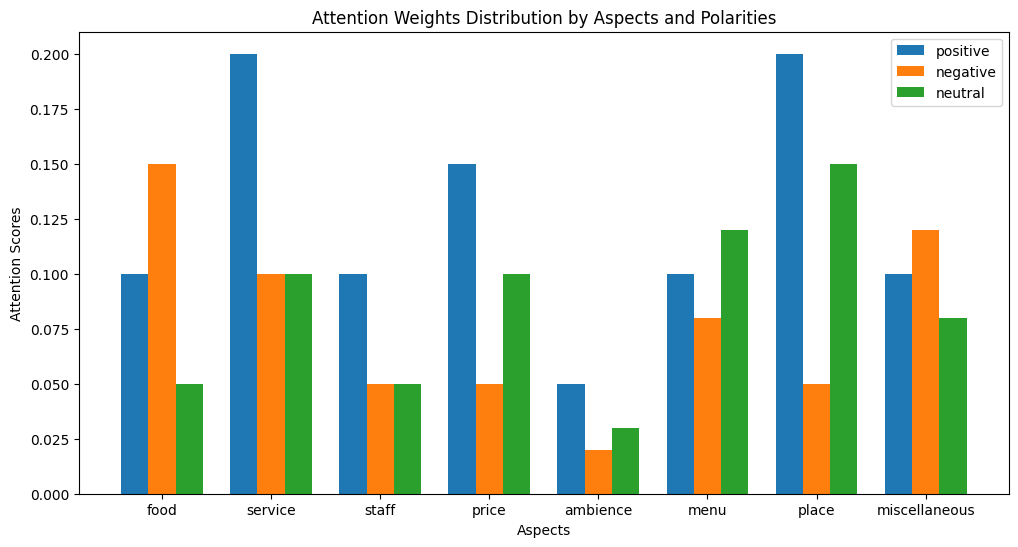

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to visualize attention weights with respect to aspects and polarities
def plot_attention_by_aspect_and_polarity(attention_weights, sample_idx, aspects, polarities):
    attention_weights = np.array(attention_weights)
    attention_scores = attention_weights[sample_idx]
    n_bars = len(polarities)

    # Create a position array for each group and shift each bar in a group
    barWidth = 0.25
    r1 = np.arange(len(aspects))
    positions = [r1 + barWidth*i for i in range(n_bars)]

    fig, ax = plt.subplots(figsize=(12, 6))

    # Create a bar for each polarity within the group
    for idx, polarity in enumerate(polarities):
        plt.bar(positions[idx], attention_scores[:, idx], width=barWidth, label=f'{polarity}')

    ax.set_xlabel('Aspects')
    ax.set_ylabel('Attention Scores')
    ax.set_title('Attention Weights Distribution by Aspects and Polarities')
    ax.set_xticks([r + barWidth for r in range(len(aspects))])
    ax.set_xticklabels(aspects)
    ax.legend()

    plt.show()

attention_weights_example = [[[0.1, 0.15, 0.05], [0.2, 0.1, 0.1], [0.1, 0.05, 0.05], [0.15, 0.05, 0.1], [0.05, 0.02, 0.03], [0.1, 0.08, 0.12], [0.2, 0.05, 0.15], [0.1, 0.12, 0.08]]]
aspects_example = ['food', 'service', 'staff', 'price', 'ambience', 'menu', 'place', 'miscellaneous']
polarities_example = ['positive', 'negative', 'neutral']

# Select a sample for visualization
sample_idx = 0  # Select the first sample

# Plot the attention weights
plot_attention_by_aspect_and_polarity(attention_weights_example, sample_idx, aspects_example, polarities_example)


Saving the Models
We save the trained models for future use.

In [163]:
torch.save(model_with_attention.state_dict(), 'model_with_attention.pth')
torch.save(model_without_attention.state_dict(), 'model_without_attention.pth')
torch.save(model_bilstm.state_dict(), 'model_bilstm.pth')

In [164]:
loaded_model_with_attention = RNNModelWithAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
loaded_model_without_attention = RNNModelWithoutAttention(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)
loaded_model_bilstm = BiLSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)


loaded_model_with_attention.load_state_dict(torch.load('model_with_attention.pth'))
loaded_model_without_attention.load_state_dict(torch.load('model_without_attention.pth'))
loaded_model_bilstm.load_state_dict(torch.load('model_bilstm.pth'))


loaded_model_with_attention.to(device)
loaded_model_without_attention.to(device)
loaded_model_bilstm.to(device)

BiLSTMModel(
  (text_embedding): Embedding(51903, 100)
  (aspect_embedding): Embedding(51903, 100)
  (rnn): LSTM(200, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)

In [165]:
loss_with_attention, acc_with_attention, labels_with_attention, preds_with_attention = evaluate_model(loaded_model_with_attention, test_loader, criterion, device, attention=True)
loss_without_attention, acc_without_attention, labels_without_attention, preds_without_attention = evaluate_model(loaded_model_without_attention, test_loader, criterion, device)
loss_bilstm, acc_bilstm, labels_bilstm, preds_bilstm = evaluate_model(loaded_model_bilstm, test_loader, criterion, device)

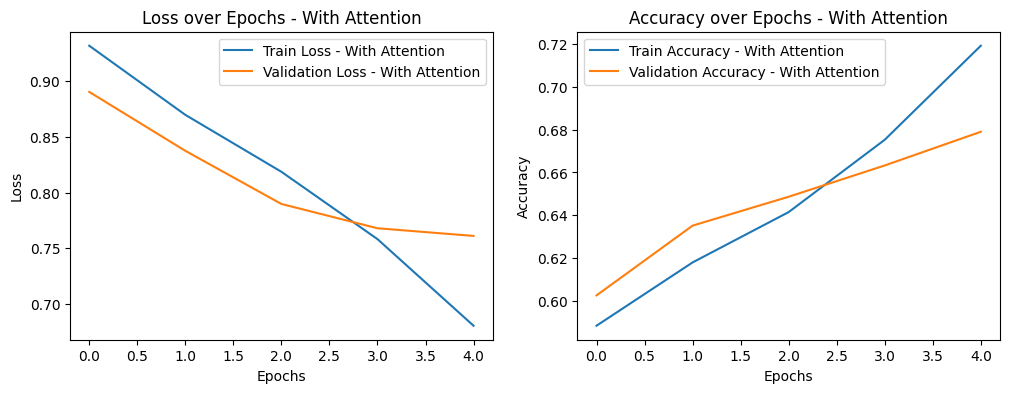

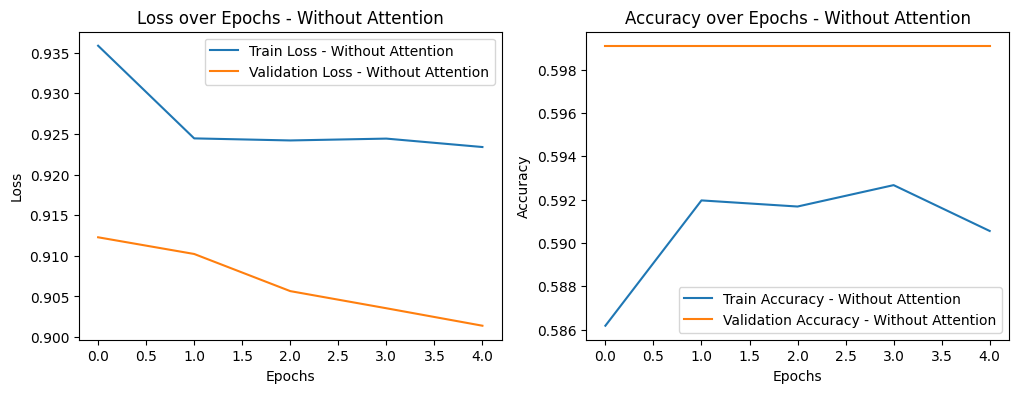

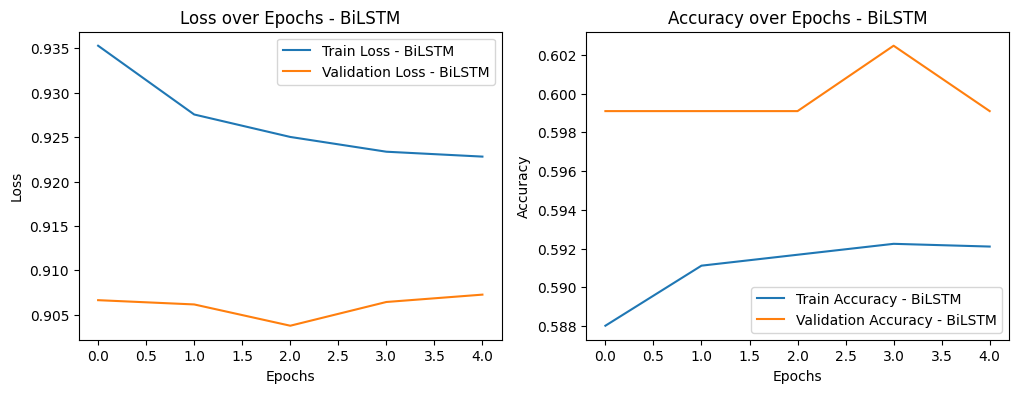

In [166]:
import matplotlib.pyplot as plt

# Define a function to plot training history
def plot_training_history(train_loss_history, val_loss_history, train_acc_history, val_acc_history, model_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label=f'Train Loss - {model_name}')
    plt.plot(val_loss_history, label=f'Validation Loss - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss over Epochs - {model_name}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label=f'Train Accuracy - {model_name}')
    plt.plot(val_acc_history, label=f'Validation Accuracy - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy over Epochs - {model_name}')
    plt.legend()

    plt.show()

# Plot training history for each model
plot_training_history(train_loss_history_with_attention, val_loss_history_with_attention, train_acc_history_with_attention, val_acc_history_with_attention, 'With Attention')
plot_training_history(train_loss_history_without_attention, val_loss_history_without_attention, train_acc_history_without_attention, val_acc_history_without_attention, 'Without Attention')
plot_training_history(train_loss_history_bilstm, val_loss_history_bilstm, train_acc_history_bilstm, val_acc_history_bilstm, 'BiLSTM')


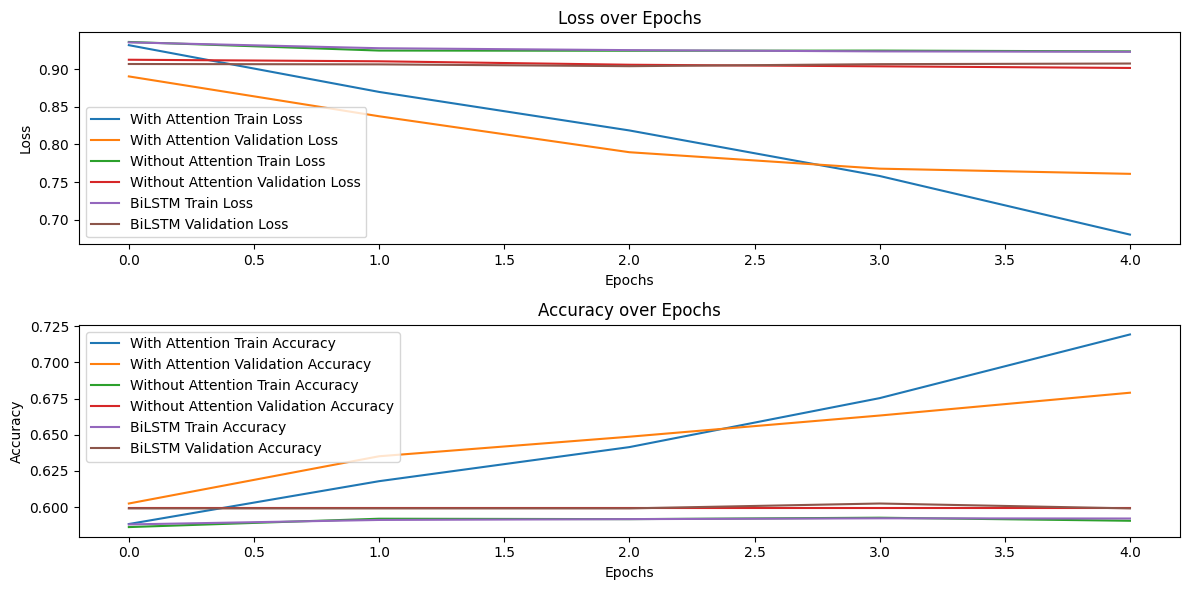

In [167]:
import matplotlib.pyplot as plt

def plot_model_performance(train_loss_histories, val_loss_histories, train_acc_histories, val_acc_histories, model_names):
    plt.figure(figsize=(12, 6))

    for i, model_name in enumerate(model_names):
        plt.subplot(2, 1, 1)
        plt.plot(train_loss_histories[i], label=f'{model_name} Train Loss')
        plt.plot(val_loss_histories[i], label=f'{model_name} Validation Loss')

        plt.subplot(2, 1, 2)
        plt.plot(train_acc_histories[i], label=f'{model_name} Train Accuracy')
        plt.plot(val_acc_histories[i], label=f'{model_name} Validation Accuracy')

    plt.subplot(2, 1, 1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Model names
model_names = ['With Attention', 'Without Attention', 'BiLSTM']

# Plot performance comparison
plot_model_performance(
    [train_loss_history_with_attention, train_loss_history_without_attention, train_loss_history_bilstm],
    [val_loss_history_with_attention, val_loss_history_without_attention, val_loss_history_bilstm],
    [train_acc_history_with_attention, train_acc_history_without_attention, train_acc_history_bilstm],
    [val_acc_history_with_attention, val_acc_history_without_attention, val_acc_history_bilstm],
    model_names
)

In [168]:
print("Model with Attention:")
print(classification_report(labels_with_attention, preds_with_attention))
print("Model without Attention:")
print(classification_report(labels_without_attention, preds_without_attention))
print("BiLSTM Model:")
print(classification_report(labels_bilstm, preds_bilstm))

Model with Attention:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       393
           1       0.58      0.51      0.54       245
           2       0.70      0.57      0.63       263

    accuracy                           0.68       901
   macro avg       0.67      0.65      0.65       901
weighted avg       0.67      0.68      0.67       901

Model without Attention:
              precision    recall  f1-score   support

           0       0.59      0.94      0.73       393
           1       0.41      0.05      0.09       245
           2       0.60      0.56      0.58       263

    accuracy                           0.59       901
   macro avg       0.53      0.52      0.47       901
weighted avg       0.54      0.59      0.51       901

BiLSTM Model:
              precision    recall  f1-score   support

           0       0.59      0.94      0.73       393
           1       0.41      0.05      0.09       245
           2  

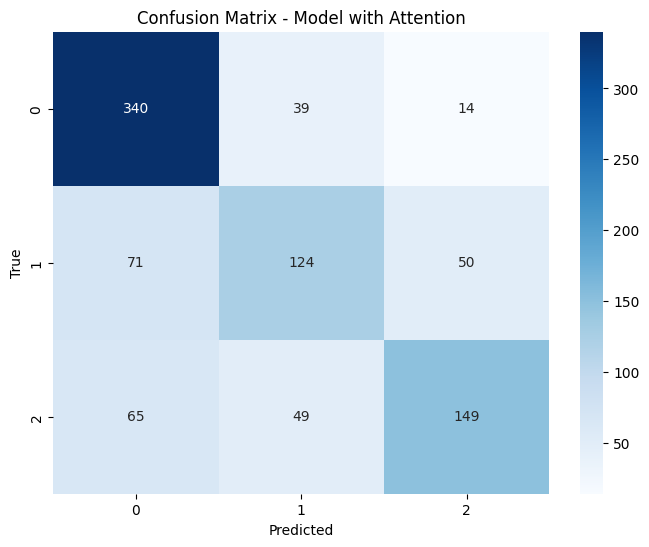

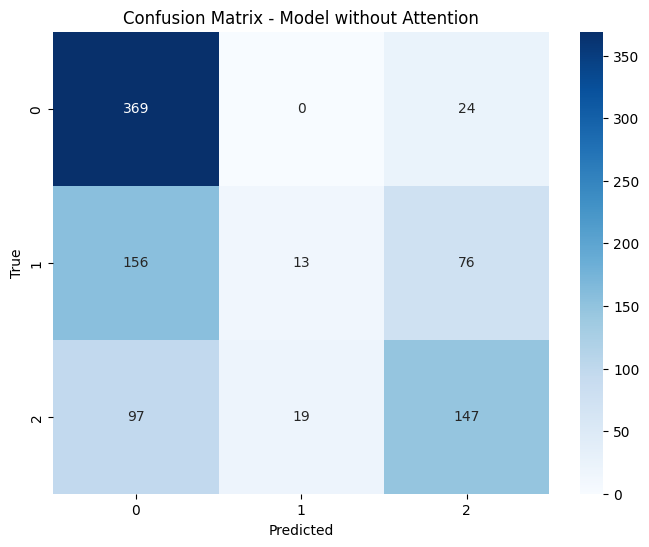

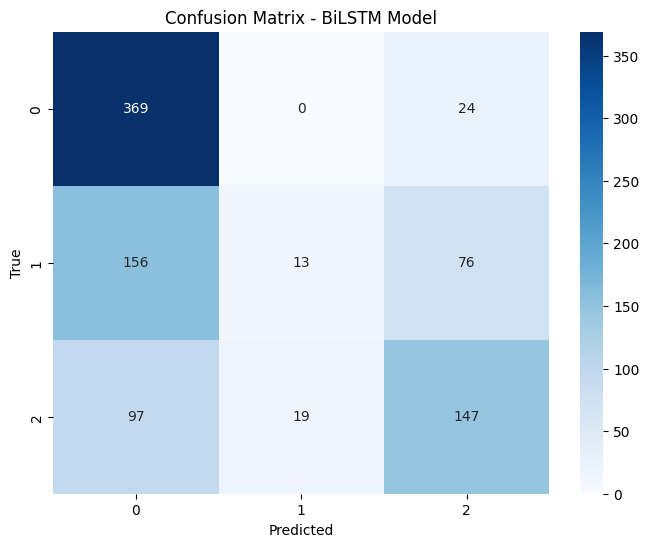

In [169]:
# Visualize Confusion Matrix
def plot_confusion_matrix(labels, preds, title):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(labels_with_attention, preds_with_attention, "Confusion Matrix - Model with Attention")
plot_confusion_matrix(labels_without_attention, preds_without_attention, "Confusion Matrix - Model without Attention")
plot_confusion_matrix(labels_bilstm, preds_bilstm, "Confusion Matrix - BiLSTM Model")


# Testing

In [170]:
# Define hyperparameters
learning_rates = [0.01, 0.001, 0.0001]
optimizers = ['Adam', 'SGD']
num_epochs_list = [5, 10]
batch_sizes = [32, 64]
criterion_list = [nn.CrossEntropyLoss(), nn.NLLLoss()]
embedding_dims = [100, 200]
hidden_dims = [128, 256]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [171]:
# Use subset for quick validation
def get_subset(dataset, ratio=0.2):
    subset_size = int(len(dataset) * ratio)
    indices = np.random.choice(len(dataset), subset_size, replace=False)
    return Subset(dataset, indices)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=3):
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0

    def step(self, loss):
        if loss < self.best_loss:
            self.best_loss = loss
            self.counter = 0
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
            else:
                return False

In [172]:
# List to store results
results = []

# Function to run experiment for a specific hyperparameter step
def run_experiment_step(model_class, model_name, attention=False, step="lr"):
    if step == "lr":
        hyperparameters = learning_rates
        hyper_name = "learning_rate"
    elif step == "optimizer":
        hyperparameters = optimizers
        hyper_name = "optimizer"
    elif step == "batch_size":
        hyperparameters = batch_sizes
        hyper_name = "batch_size"
    elif step == "embedding_dim":
        hyperparameters = embedding_dims
        hyper_name = "embedding_dim"
    elif step == "hidden_dim":
        hyperparameters = hidden_dims
        hyper_name = "hidden_dim"
    elif step == "num_epochs":
        hyperparameters = num_epochs_list
        hyper_name = "num_epochs"
    elif step == "criterion":
        hyperparameters = criterion_list
        hyper_name = "criterion"
    else:
        raise ValueError(f"Unsupported step: {step}")

    best_param = None
    best_accuracy = 0

    for param in hyperparameters:
        # Set default values for parameters
        if step == "lr":
            lr = param
            optimizer_param = 'Adam'
        elif step == "optimizer":
            lr = 0.001
            optimizer_param = param
        else:
            lr = 0.001
            optimizer_param = 'Adam'

        num_epochs = 5
        batch_size = 32
        criterion = nn.CrossEntropyLoss()
        embedding_dim = 100
        hidden_dim = 128

        # Update specific parameters based on step
        if step == "batch_size":
            batch_size = param
        elif step == "embedding_dim":
            embedding_dim = param
        elif step == "hidden_dim":
            hidden_dim = param
        elif step == "num_epochs":
            num_epochs = param
        elif step == "criterion":
            criterion = param

        # Use subset for quick validation
        train_subset = get_subset(train_dataset, ratio=0.2)
        val_subset = get_subset(val_dataset, ratio=0.2)
        test_subset = get_subset(test_dataset, ratio=0.2)

        train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)

        # Initialize model
        model = model_class(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, device=device)

        # Select optimizer
        if optimizer_param == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr)
        elif optimizer_param == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr)

        print(f"Training {model_name} with {hyper_name} {param}, optimizer {optimizer_param}, num_epochs {num_epochs}, batch_size {batch_size}, criterion {criterion.__class__.__name__}, embedding_dim {embedding_dim}, hidden_dim {hidden_dim}")

        # Train model
        early_stopping = EarlyStopping(patience=3)
        if attention:
            train_loss, val_loss, train_acc, val_acc, _ = train_model(
                model, optimizer, train_loader, val_loader, criterion, device, num_epochs=num_epochs, attention=attention)
        else:
            train_loss, val_loss, train_acc, val_acc = train_model(
                model, optimizer, train_loader, val_loader, criterion, device, num_epochs=num_epochs, attention=attention)

        # Evaluate model
        test_loss, test_accuracy, labels, preds = evaluate_model(model, test_loader, criterion, device, attention=attention)

        results.append({
            'model': model_name,
            'hyper_name': hyper_name,
            hyper_name: param,
            'learning_rate': lr,
            'optimizer': optimizer_param,
            'num_epochs': num_epochs,
            'batch_size': batch_size,
            'criterion': criterion.__class__.__name__,
            'embedding_dim': embedding_dim,
            'hidden_dim': hidden_dim,
            'train_loss': train_loss,
            'val_loss': val_loss,
            'train_acc': train_acc,
            'val_acc': val_acc,
            'test_loss': test_loss,
            'test_accuracy': test_accuracy
        })

        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_param = param

    print(f"Best {hyper_name} for {model_name}: {best_param} with accuracy {best_accuracy:.4f}")
    return best_param

In [173]:
# Function to optimize each hyperparameter step-by-step
def optimize_model(model_class, model_name, attention):
    best_lr = run_experiment_step(model_class, model_name, attention=attention, step="lr")
    best_optimizer = run_experiment_step(model_class, model_name, attention=attention, step="optimizer")
    best_batch_size = run_experiment_step(model_class, model_name, attention=attention, step="batch_size")
    best_embedding_dim = run_experiment_step(model_class, model_name, attention=attention, step="embedding_dim")
    best_hidden_dim = run_experiment_step(model_class, model_name, attention=attention, step="hidden_dim")
    best_num_epochs = run_experiment_step(model_class, model_name, attention=attention, step="num_epochs")
    best_criterion = run_experiment_step(model_class, model_name, attention=attention, step="criterion")

    return best_lr, best_optimizer, best_batch_size, best_embedding_dim, best_hidden_dim, best_num_epochs, best_criterion

In [174]:
print("Optimizing RNNModelWithAttention")
optimize_model(RNNModelWithAttention, "RNNModelWithAttention", attention=True)

Optimizing RNNModelWithAttention
Training RNNModelWithAttention with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9972, Train Accuracy: 0.5592, Val Loss: 0.9578, Val Accuracy: 0.5537
Epoch [2/5], Train Loss: 0.9420, Train Accuracy: 0.5924, Val Loss: 0.9531, Val Accuracy: 0.5537
Epoch [3/5], Train Loss: 0.9130, Train Accuracy: 0.6079, Val Loss: 0.8695, Val Accuracy: 0.6158
Epoch [4/5], Train Loss: 0.7991, Train Accuracy: 0.6629, Val Loss: 0.8697, Val Accuracy: 0.6328
Epoch [5/5], Train Loss: 0.6559, Train Accuracy: 0.7348, Val Loss: 0.8737, Val Accuracy: 0.6271
Test Loss: 0.9677, Test Accuracy: 0.5444
Training RNNModelWithAttention with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9719, Train Accuracy: 0.5719, Val Loss: 0.9618, Val Accuracy: 0.5480
Epoch [2/5], Train Loss

(0.001, 'Adam', 64, 200, 128, 10, NLLLoss())

In [175]:
print("Optimizing RNNModelWithoutAttention")
optimize_model(RNNModelWithoutAttention, "RNNModelWithoutAttention", attention=False)

Optimizing RNNModelWithoutAttention
Training RNNModelWithoutAttention with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9719, Train Accuracy: 0.5606, Val Loss: 0.9388, Val Accuracy: 0.5706
Epoch [2/5], Train Loss: 0.9184, Train Accuracy: 0.5952, Val Loss: 0.9462, Val Accuracy: 0.5706
Epoch [3/5], Train Loss: 0.9150, Train Accuracy: 0.5903, Val Loss: 0.9270, Val Accuracy: 0.5706
Epoch [4/5], Train Loss: 0.9082, Train Accuracy: 0.6023, Val Loss: 0.9288, Val Accuracy: 0.5706
Epoch [5/5], Train Loss: 0.9009, Train Accuracy: 0.6008, Val Loss: 0.9269, Val Accuracy: 0.5706
Test Loss: 0.8923, Test Accuracy: 0.5944
Training RNNModelWithoutAttention with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9586, Train Accuracy: 0.5776, Val Loss: 0.8843, Val Accuracy: 0.6158
Epoch [2/5], T

(0.0001, 'Adam', 64, 100, 128, 5, NLLLoss())

In [176]:
print("Optimizing BiLSTMModel")
optimize_model(BiLSTMModel, "BiLSTMModel", attention=False)

Optimizing BiLSTMModel
Training BiLSTMModel with learning_rate 0.01, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 1.0035, Train Accuracy: 0.5536, Val Loss: 0.9138, Val Accuracy: 0.6158
Epoch [2/5], Train Loss: 0.9489, Train Accuracy: 0.5790, Val Loss: 0.8888, Val Accuracy: 0.6158
Epoch [3/5], Train Loss: 0.9432, Train Accuracy: 0.5811, Val Loss: 0.8797, Val Accuracy: 0.6158
Epoch [4/5], Train Loss: 0.9436, Train Accuracy: 0.5804, Val Loss: 0.9050, Val Accuracy: 0.6158
Epoch [5/5], Train Loss: 0.9444, Train Accuracy: 0.5832, Val Loss: 0.8927, Val Accuracy: 0.6215
Test Loss: 0.9364, Test Accuracy: 0.5944
Training BiLSTMModel with learning_rate 0.001, optimizer Adam, num_epochs 5, batch_size 32, criterion CrossEntropyLoss, embedding_dim 100, hidden_dim 128
Epoch [1/5], Train Loss: 0.9657, Train Accuracy: 0.5804, Val Loss: 0.9631, Val Accuracy: 0.5763
Epoch [2/5], Train Loss: 0.9351, Train Accuracy: 0.59

(0.01, 'Adam', 32, 200, 128, 10, CrossEntropyLoss())

In [177]:
df_results = pd.DataFrame(results)
print(df_results)

                       model     hyper_name  learning_rate optimizer  \
0      RNNModelWithAttention  learning_rate         0.0100      Adam   
1      RNNModelWithAttention  learning_rate         0.0010      Adam   
2      RNNModelWithAttention  learning_rate         0.0001      Adam   
3      RNNModelWithAttention      optimizer         0.0010      Adam   
4      RNNModelWithAttention      optimizer         0.0010       SGD   
5      RNNModelWithAttention     batch_size         0.0010      Adam   
6      RNNModelWithAttention     batch_size         0.0010      Adam   
7      RNNModelWithAttention  embedding_dim         0.0010      Adam   
8      RNNModelWithAttention  embedding_dim         0.0010      Adam   
9      RNNModelWithAttention     hidden_dim         0.0010      Adam   
10     RNNModelWithAttention     hidden_dim         0.0010      Adam   
11     RNNModelWithAttention     num_epochs         0.0010      Adam   
12     RNNModelWithAttention     num_epochs         0.0010      

train_loss: [0.9972432401445177, 0.941996791627672, 0.9129630949762132, 0.7990668296813965, 0.6558612644672394]
val_loss: [0.9578372438748678, 0.9531065821647644, 0.8695030212402344, 0.8697465558846792, 0.8736510078112284]
train_acc: [0.5592383638928068, 0.5923836389280677, 0.607898448519041, 0.6629055007052186, 0.7348377997179125]
val_acc: [0.5536723163841808, 0.5536723163841808, 0.615819209039548, 0.632768361581921, 0.6271186440677966]


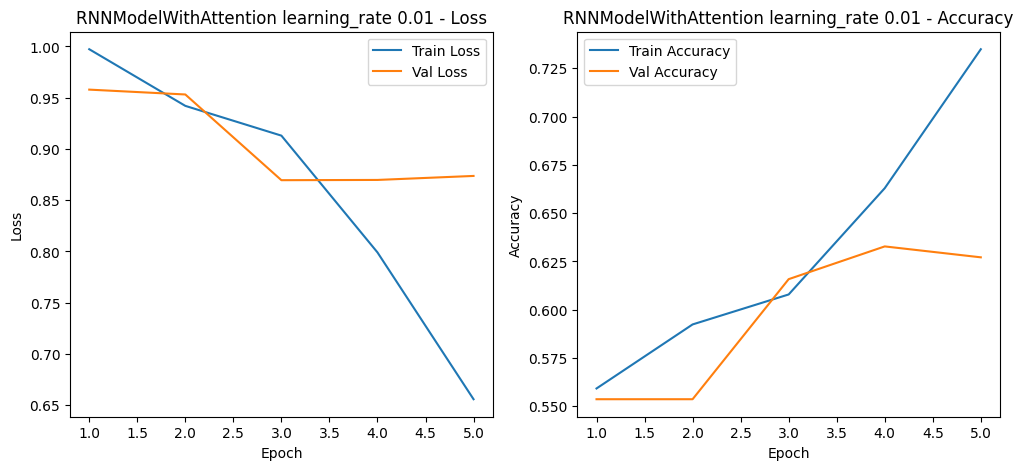

train_loss: [0.9718644857406616, 0.9212944759262933, 0.912721406088935, 0.8925859835412767, 0.8534697863790724]
val_loss: [0.9617820779482523, 0.9641084869702657, 0.9491421083609263, 0.9428283671538035, 0.9209143817424774]
train_acc: [0.5719322990126939, 0.5973201692524682, 0.5973201692524682, 0.61212976022567, 0.6368124118476728]
val_acc: [0.5480225988700564, 0.5480225988700564, 0.559322033898305, 0.5875706214689266, 0.6045197740112994]


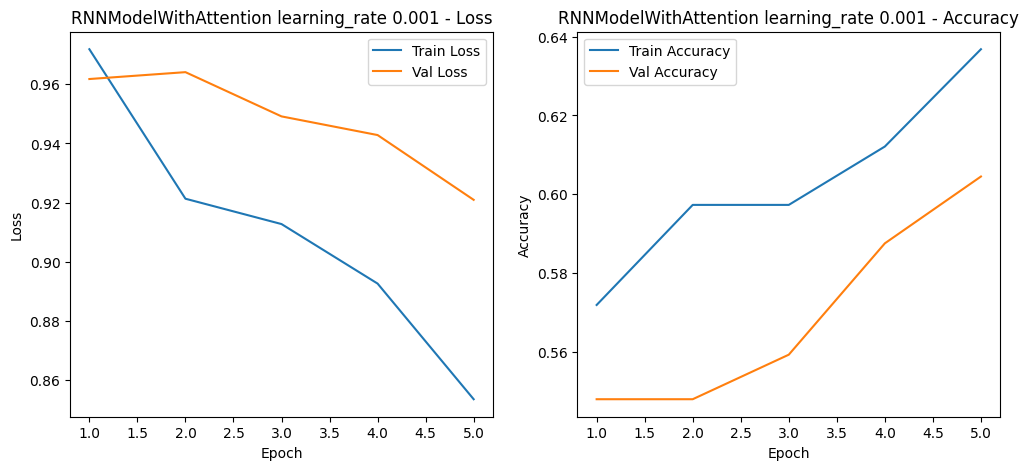

train_loss: [1.0494508319430882, 0.9590952475865682, 0.9187108132574293, 0.9236091666751438, 0.9165923396746317]
val_loss: [0.9693567752838135, 0.908595452706019, 0.9120937387148539, 0.9087011416753134, 0.9080527524153391]
train_acc: [0.5380818053596615, 0.5930888575458392, 0.5952045133991537, 0.5952045133991537, 0.5952045133991537]
val_acc: [0.5706214689265536, 0.576271186440678, 0.576271186440678, 0.576271186440678, 0.576271186440678]


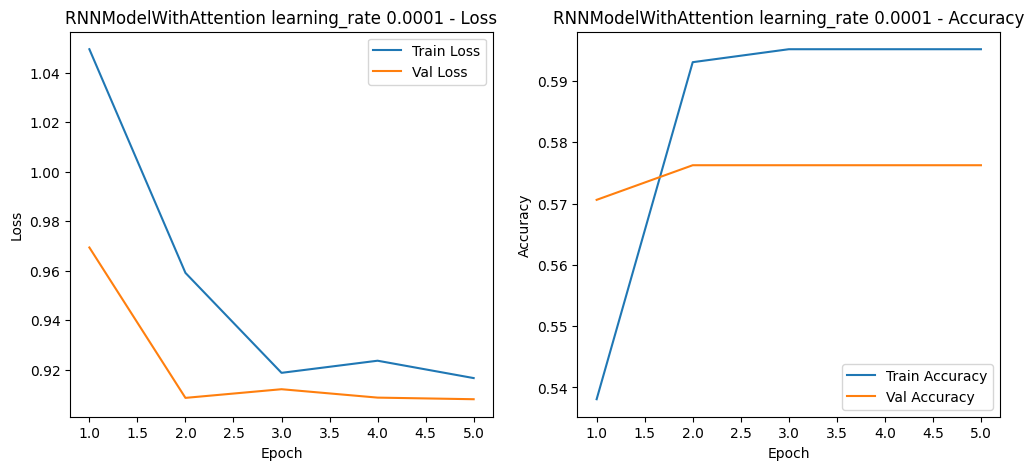

train_loss: [0.9477528770764668, 0.9137787342071533, 0.8962322195370992, 0.8705162776841058, 0.8336486829651727]
val_loss: [0.8802895247936249, 0.8871997892856598, 0.8861630161603292, 0.8775535325209299, 0.8690913319587708]
train_acc: [0.5712270803949224, 0.5895627644569816, 0.6022566995768688, 0.6198871650211566, 0.6459802538787024]
val_acc: [0.6101694915254238, 0.6101694915254238, 0.6214689265536724, 0.6214689265536724, 0.6045197740112994]


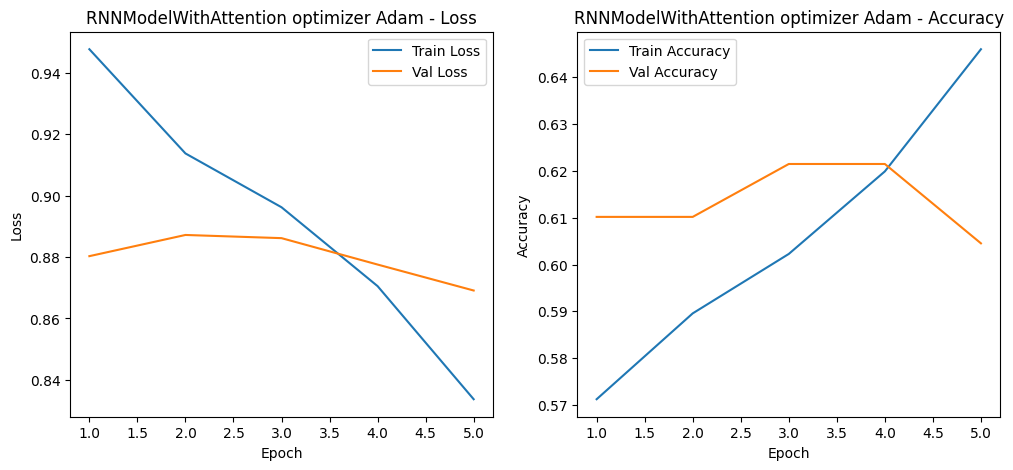

train_loss: [1.115180073844062, 1.1118221229977079, 1.1076979610655042, 1.1041452937655978, 1.1009552266862657]
val_loss: [1.111738661924998, 1.1084021925926208, 1.1052829027175903, 1.1023334463437398, 1.0994516213734944]
train_acc: [0.29055007052186177, 0.29901269393511987, 0.29760225669957685, 0.2997179125528914, 0.3032440056417489]
val_acc: [0.2824858757062147, 0.2824858757062147, 0.2994350282485876, 0.3050847457627119, 0.3163841807909605]


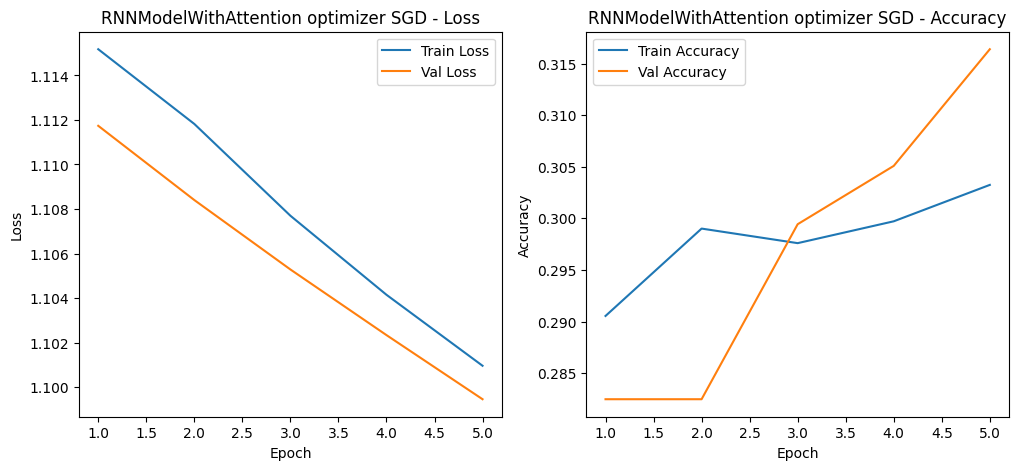

train_loss: [0.964670283264584, 0.9350141127904256, 0.9190001077122159, 0.9124830736054315, 0.8761311067475213]
val_loss: [0.9398113489151001, 0.9311815003554026, 0.9213970104853312, 0.9203356405099233, 0.9045917391777039]
train_acc: [0.5571227080394923, 0.5881523272214386, 0.5930888575458392, 0.5980253878702397, 0.6255289139633287]
val_acc: [0.559322033898305, 0.6214689265536724, 0.6214689265536724, 0.6271186440677966, 0.6045197740112994]


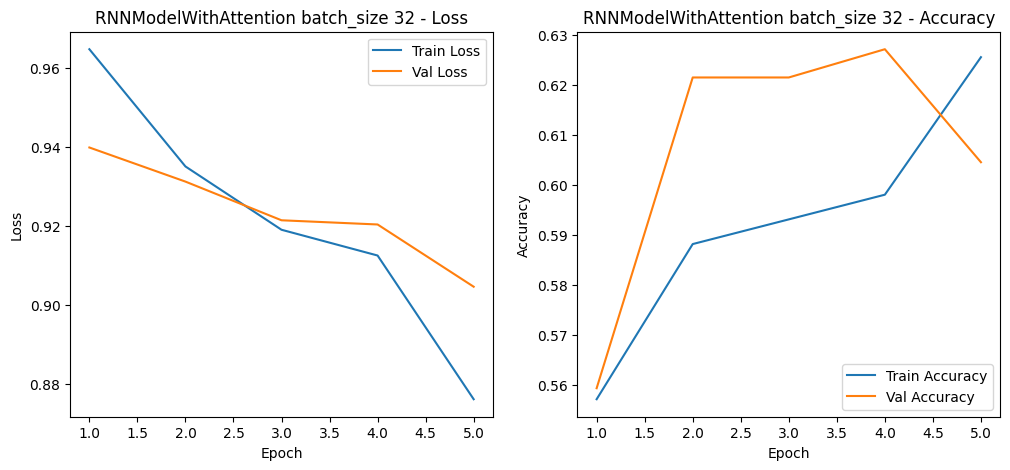

train_loss: [0.9718497058619624, 0.9356624639552572, 0.923948681872824, 0.9281369836434074, 0.8979155162106389]
val_loss: [0.9025102257728577, 0.8878486752510071, 0.8763179977734884, 0.8556227286656698, 0.8389077583948771]
train_acc: [0.5514809590973202, 0.581805359661495, 0.5846262341325811, 0.5825105782792666, 0.5895627644569816]
val_acc: [0.6271186440677966, 0.6271186440677966, 0.6271186440677966, 0.6384180790960452, 0.6440677966101694]


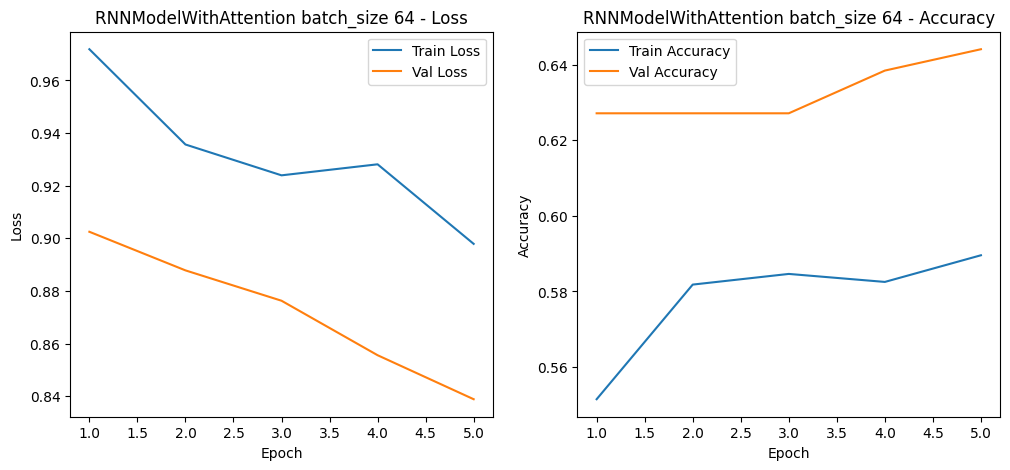

train_loss: [0.9829163922203912, 0.9650792678197225, 0.9520205537478129, 0.9384080105357699, 0.9365869866477119]
val_loss: [0.9602877994378408, 0.9471236566702524, 0.9469987948735555, 0.9402720630168915, 0.9346103568871816]
train_acc: [0.5416078984485191, 0.5599435825105783, 0.5684062059238364, 0.5726375176304654, 0.5768688293370945]
val_acc: [0.5819209039548022, 0.5819209039548022, 0.5819209039548022, 0.5819209039548022, 0.5875706214689266]


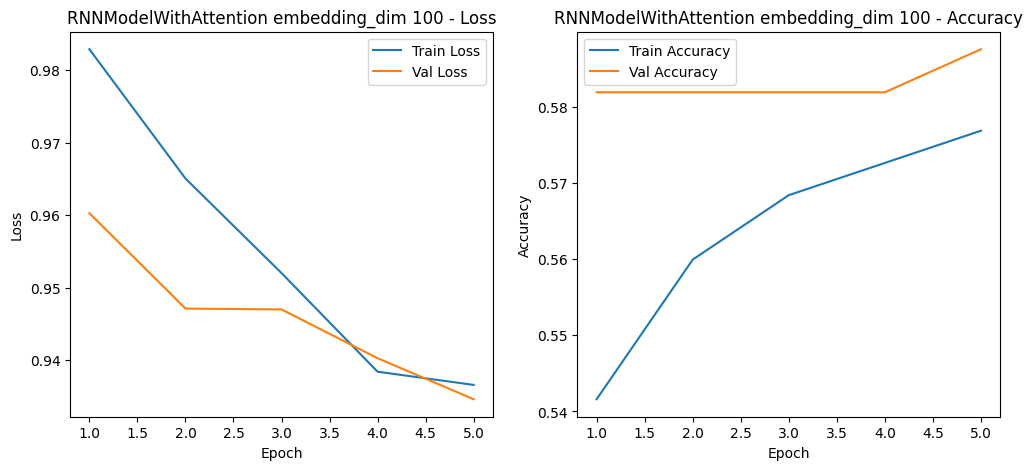

train_loss: [0.963724078072442, 0.9167044811778599, 0.9071669141451518, 0.8730366018083361, 0.8263046662012736]
val_loss: [0.9055123329162598, 0.8972424666086832, 0.8762998084227244, 0.8598792850971222, 0.8239952723185221]
train_acc: [0.5578279266572638, 0.5909732016925247, 0.5930888575458392, 0.6184767277856136, 0.6417489421720733]
val_acc: [0.615819209039548, 0.6214689265536724, 0.5988700564971752, 0.6497175141242938, 0.6440677966101694]


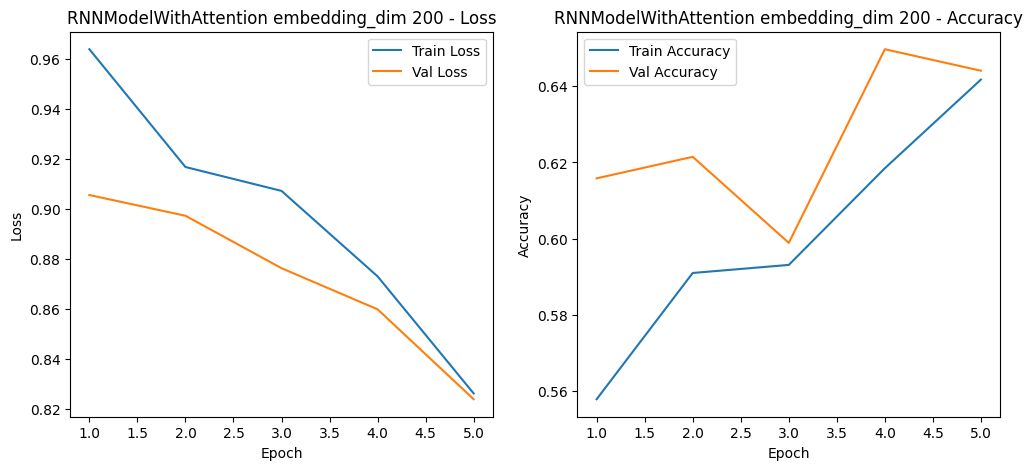

train_loss: [0.9572608431180318, 0.9253660056326124, 0.9210494028197395, 0.9229657332102458, 0.8684615612030029]
val_loss: [0.8823061386744181, 0.8987216353416443, 0.8808020651340485, 0.868392417828242, 0.9230896135171255]
train_acc: [0.5606488011283498, 0.5825105782792666, 0.578984485190409, 0.5740479548660085, 0.6128349788434415]
val_acc: [0.6271186440677966, 0.632768361581921, 0.6101694915254238, 0.6101694915254238, 0.5988700564971752]


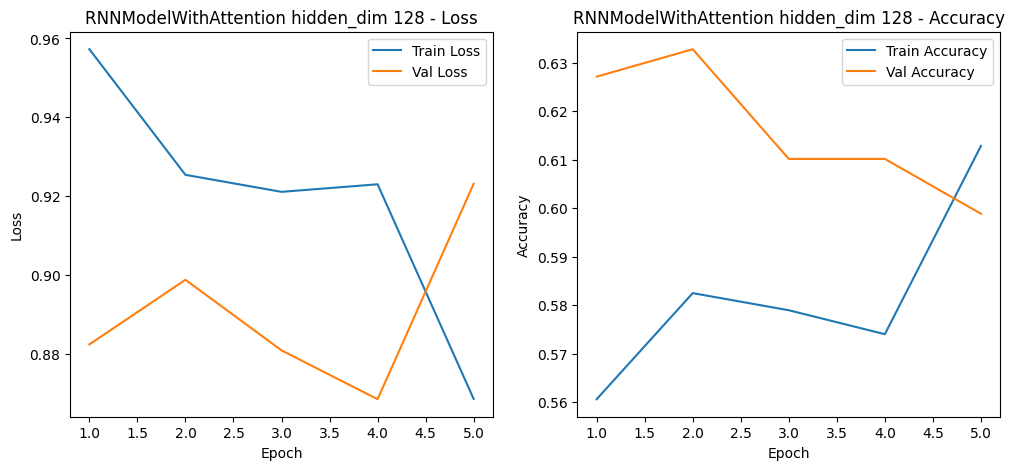

train_loss: [0.9910325527191162, 0.9502323230107625, 0.950026293595632, 0.9444350878397624, 0.909619853231642]
val_loss: [0.9181918998559316, 0.9140096108118693, 0.9089664121468862, 0.940664658943812, 0.8965924878915151]
train_acc: [0.535966149506347, 0.5677009873060649, 0.5719322990126939, 0.5712270803949224, 0.6043723554301833]
val_acc: [0.5988700564971752, 0.6101694915254238, 0.6214689265536724, 0.5875706214689266, 0.615819209039548]


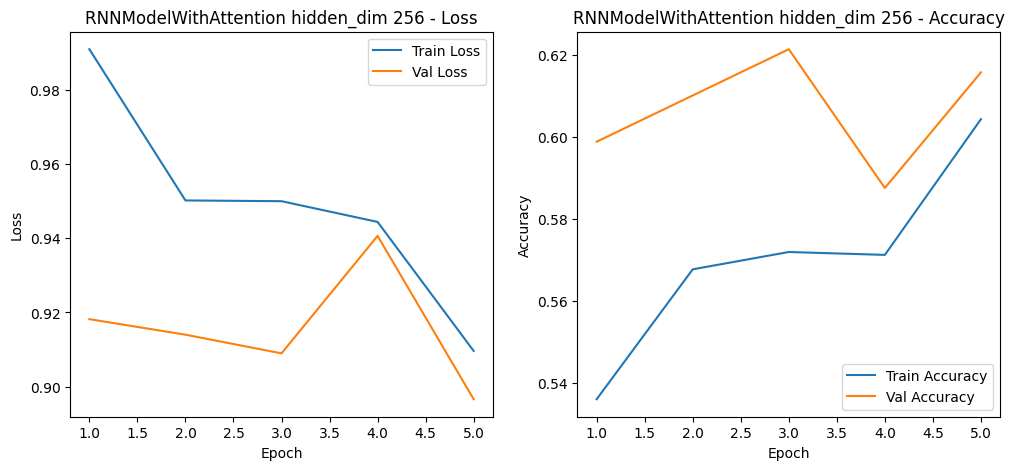

train_loss: [0.9651335027482775, 0.934525990486145, 0.9245696200264825, 0.9052840206358168, 0.8630679183536105]
val_loss: [0.9285966952641805, 0.9190906683603922, 0.9010380109151205, 0.9311505158742269, 0.8738147417704264]
train_acc: [0.5684062059238364, 0.5796897038081805, 0.5923836389280677, 0.61212976022567, 0.6361071932299013]
val_acc: [0.5875706214689266, 0.5875706214689266, 0.576271186440678, 0.5536723163841808, 0.5932203389830508]


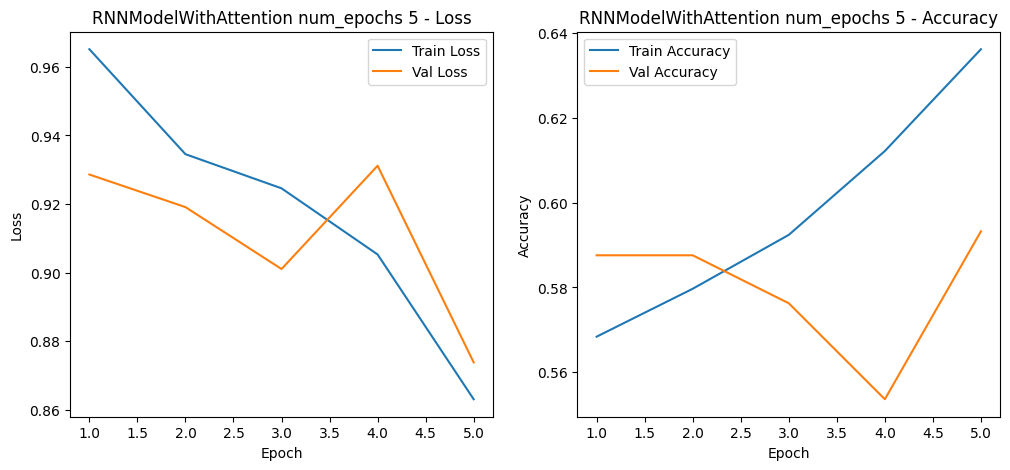

train_loss: [0.963731684949663, 0.9299854411019219, 0.9184969041082595, 0.8856415616141425, 0.8538488652971056, 0.8063400612937079, 0.7789595796002282, 0.6987237029605442, 0.6386892762449052, 0.5492851701047685]
val_loss: [0.9083913664023081, 0.9023438890775045, 0.8885857065518697, 0.9281914929548899, 0.8766073087851206, 0.8801312645276388, 0.9025779267152151, 0.8514267603556315, 0.9156834383805593, 1.0272130270799]
train_acc: [0.57475317348378, 0.5944992947813822, 0.5944992947813822, 0.6198871650211566, 0.6227080394922426, 0.657968970380818, 0.6791255289139634, 0.7101551480959097, 0.7383638928067701, 0.7813822284908322]
val_acc: [0.5875706214689266, 0.576271186440678, 0.5875706214689266, 0.559322033898305, 0.559322033898305, 0.5875706214689266, 0.559322033898305, 0.5819209039548022, 0.6214689265536724, 0.576271186440678]


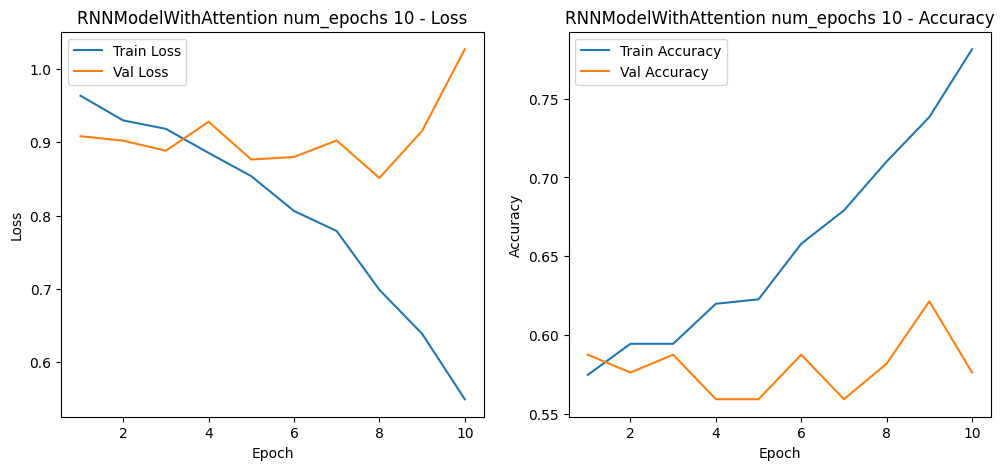

train_loss: [0.9672061390346951, 0.9393104685677423, 0.9243294411235385, 0.915775105688307, 0.8688899649514092]
val_loss: [0.8836354414621989, 0.89252636830012, 0.8692434628804525, 0.8468252420425415, 0.7980327308177948]
train_acc: [0.5578279266572638, 0.5881523272214386, 0.5902679830747531, 0.5881523272214386, 0.6318758815232722]
val_acc: [0.6440677966101694, 0.6384180790960452, 0.6384180790960452, 0.6384180790960452, 0.6666666666666666]


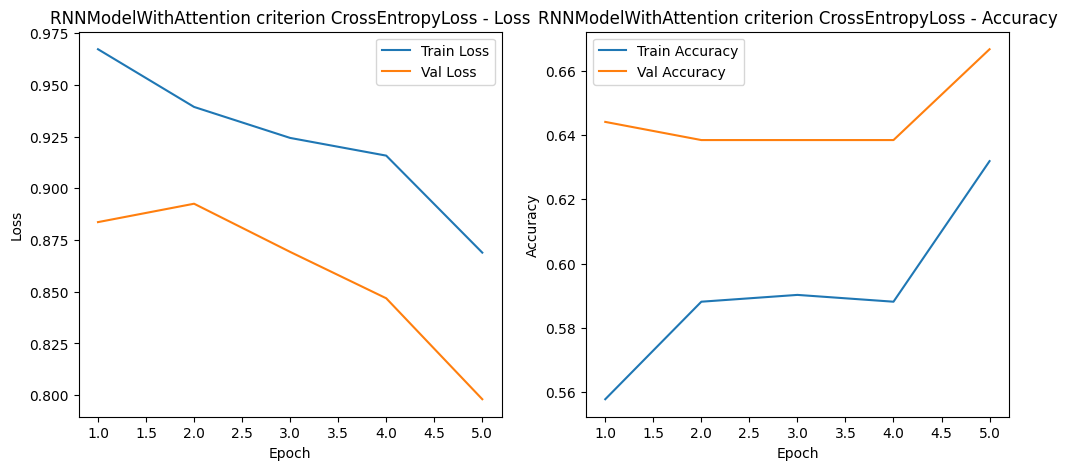

train_loss: [0.9561411009894477, 0.9345869263013203, 0.9256920284695096, 0.8917883144484626, 0.8577880753411187]
val_loss: [0.9153563976287842, 0.898873100678126, 0.8948691089948019, 0.8946917951107025, 0.9233060777187347]
train_acc: [0.5606488011283498, 0.581805359661495, 0.5881523272214386, 0.6191819464033851, 0.6354019746121298]
val_acc: [0.615819209039548, 0.615819209039548, 0.615819209039548, 0.5988700564971752, 0.6045197740112994]


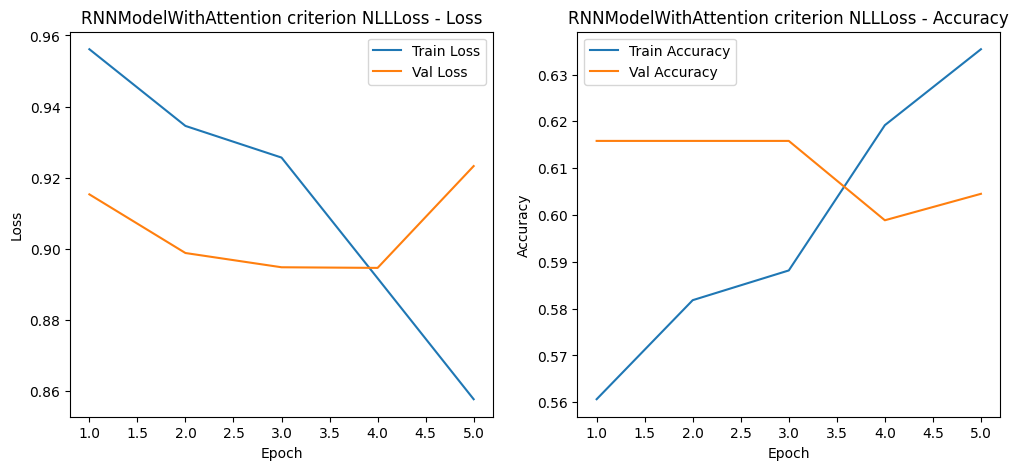

train_loss: [0.971862973107232, 0.9184003048472934, 0.9150453673468696, 0.9082395686043634, 0.900932350423601]
val_loss: [0.9387625058492025, 0.9461621940135956, 0.9269517958164215, 0.9288097321987152, 0.9269459942976633]
train_acc: [0.5606488011283498, 0.5952045133991537, 0.5902679830747531, 0.6022566995768688, 0.6008462623413258]
val_acc: [0.5706214689265536, 0.5706214689265536, 0.5706214689265536, 0.5706214689265536, 0.5706214689265536]


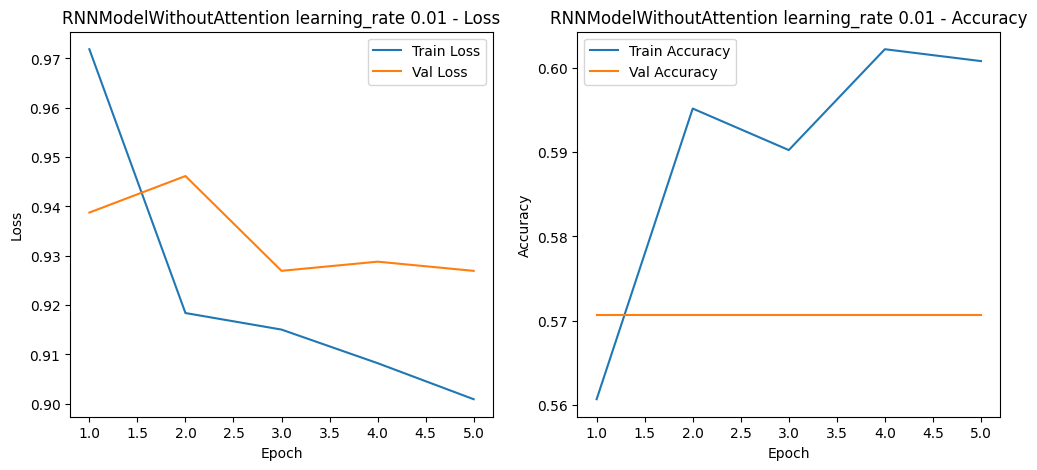

train_loss: [0.9585559301906161, 0.9332157068782383, 0.9264097332954406, 0.9201014094882541, 0.9175825887256198]
val_loss: [0.8842722475528717, 0.8978970845540365, 0.8903505106767019, 0.8735739489396414, 0.8953461746374766]
train_acc: [0.577574047954866, 0.5959097320169252, 0.5923836389280677, 0.5895627644569816, 0.5952045133991537]
val_acc: [0.615819209039548, 0.5932203389830508, 0.5932203389830508, 0.615819209039548, 0.5932203389830508]


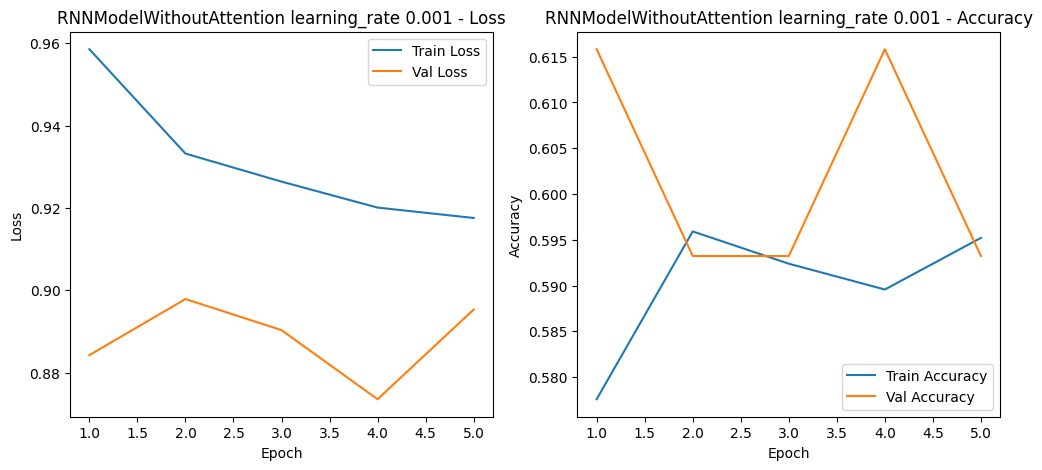

train_loss: [1.036229149500529, 0.9446783343950907, 0.9335865312152438, 0.9216981967290242, 0.9178536070717705]
val_loss: [0.9400983254114786, 0.8944084644317627, 0.8897546629110972, 0.8891811867554983, 0.8939957221349081]
train_acc: [0.4908321579689704, 0.5853314527503526, 0.5909732016925247, 0.5909732016925247, 0.5909732016925247]
val_acc: [0.5875706214689266, 0.6214689265536724, 0.6214689265536724, 0.6214689265536724, 0.6214689265536724]


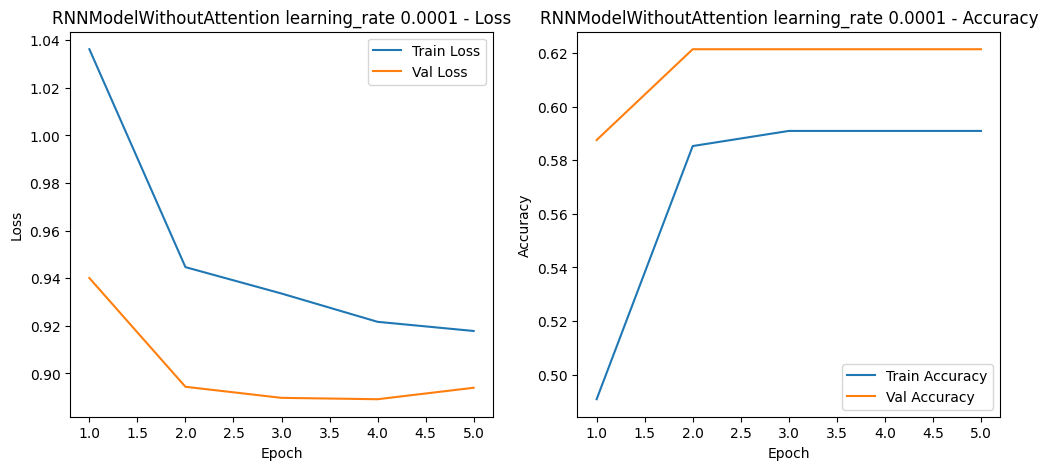

train_loss: [0.9629767404662238, 0.9423937002817789, 0.9327667448255751, 0.936033915148841, 0.935445679558648]
val_loss: [0.840598851442337, 0.8277203440666199, 0.8474859893321991, 0.8343762457370758, 0.8310259083906809]
train_acc: [0.5592383638928068, 0.5796897038081805, 0.5782792665726375, 0.5754583921015515, 0.580394922425952]
val_acc: [0.6836158192090396, 0.6836158192090396, 0.672316384180791, 0.672316384180791, 0.6836158192090396]


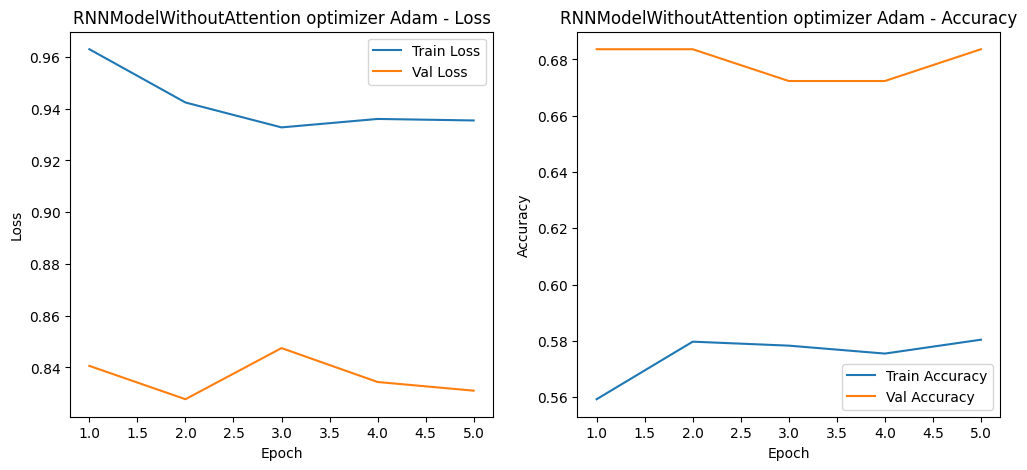

train_loss: [1.1032977051205106, 1.1009960148069593, 1.098408219549391, 1.0962642272313436, 1.093597706158956]
val_loss: [1.0956666072209675, 1.092896004517873, 1.0901944835980732, 1.087714970111847, 1.0853450298309326]
train_acc: [0.2827926657263752, 0.3025387870239774, 0.3540197461212976, 0.36459802538787023, 0.37729196050775743]
val_acc: [0.3050847457627119, 0.3050847457627119, 0.2824858757062147, 0.3502824858757062, 0.327683615819209]


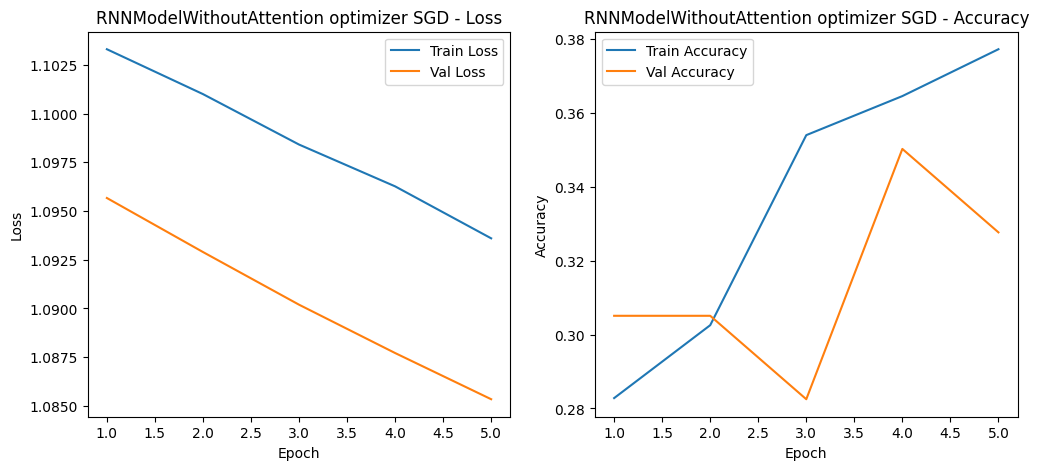

train_loss: [0.9676699188020494, 0.9365044845475091, 0.9344008511967129, 0.9354207926326328, 0.9292053408092923]
val_loss: [0.8625485400358835, 0.8513378500938416, 0.8673373361428579, 0.8688241541385651, 0.8531566560268402]
train_acc: [0.5613540197461213, 0.5902679830747531, 0.5902679830747531, 0.5902679830747531, 0.5902679830747531]
val_acc: [0.655367231638418, 0.655367231638418, 0.655367231638418, 0.655367231638418, 0.655367231638418]


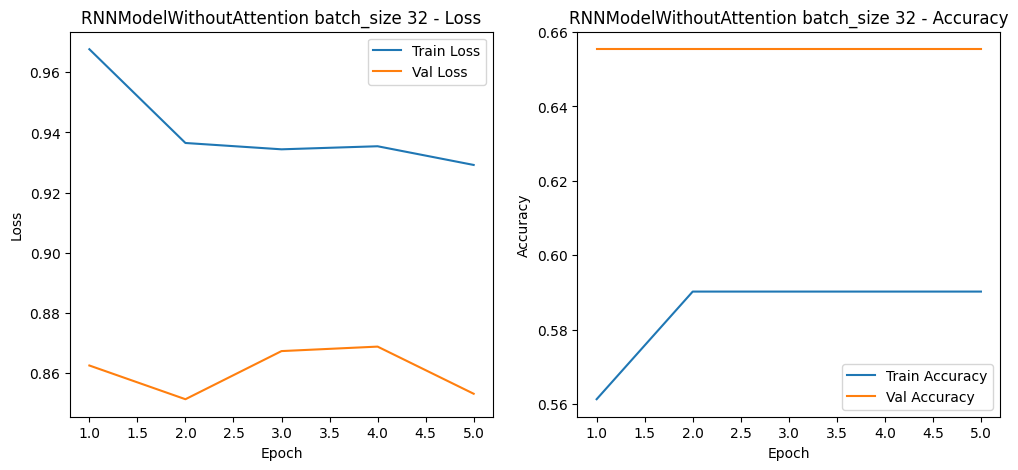

train_loss: [0.9511982124784718, 0.9199745577314625, 0.8967527902644613, 0.928119869335838, 0.9126685494961946]
val_loss: [0.9308900634447733, 0.9294963677724203, 0.9280050794283549, 0.9323807756106058, 0.9293219049771627]
train_acc: [0.5768688293370945, 0.5923836389280677, 0.5980253878702397, 0.5987306064880112, 0.5930888575458392]
val_acc: [0.5875706214689266, 0.5875706214689266, 0.5875706214689266, 0.5875706214689266, 0.5875706214689266]


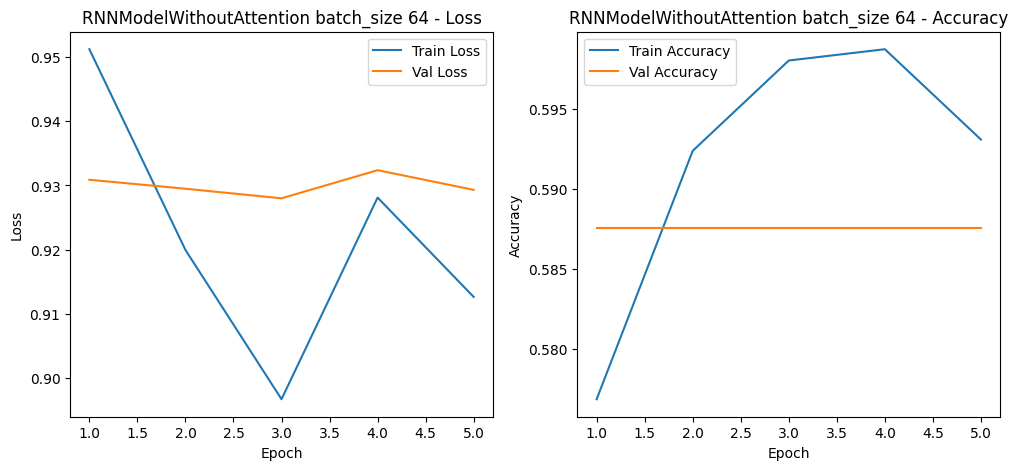

train_loss: [0.9478937824567158, 0.9150588379965888, 0.907678735256195, 0.9100101894802517, 0.9077168332205878]
val_loss: [0.9140206873416901, 0.901842455069224, 0.8946207364400228, 0.8851101696491241, 0.8955562909444174]
train_acc: [0.5874471086036671, 0.6043723554301833, 0.6057827926657263, 0.6008462623413258, 0.6022566995768688]
val_acc: [0.6440677966101694, 0.6214689265536724, 0.6440677966101694, 0.6440677966101694, 0.6440677966101694]


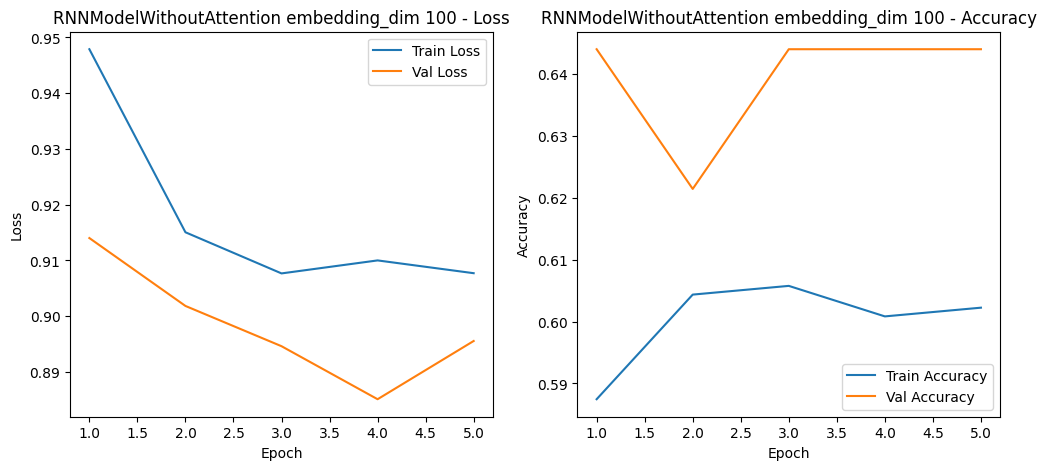

train_loss: [0.9725088185734219, 0.9439013441403706, 0.9380240824487475, 0.9419397830963134, 0.9426214999622768]
val_loss: [0.8895814120769501, 0.8755732576052347, 0.8938453594843546, 0.8802724381287893, 0.8765727281570435]
train_acc: [0.5641748942172073, 0.5860366713681241, 0.5860366713681241, 0.5860366713681241, 0.5839210155148096]
val_acc: [0.6384180790960452, 0.6384180790960452, 0.6384180790960452, 0.6384180790960452, 0.6384180790960452]


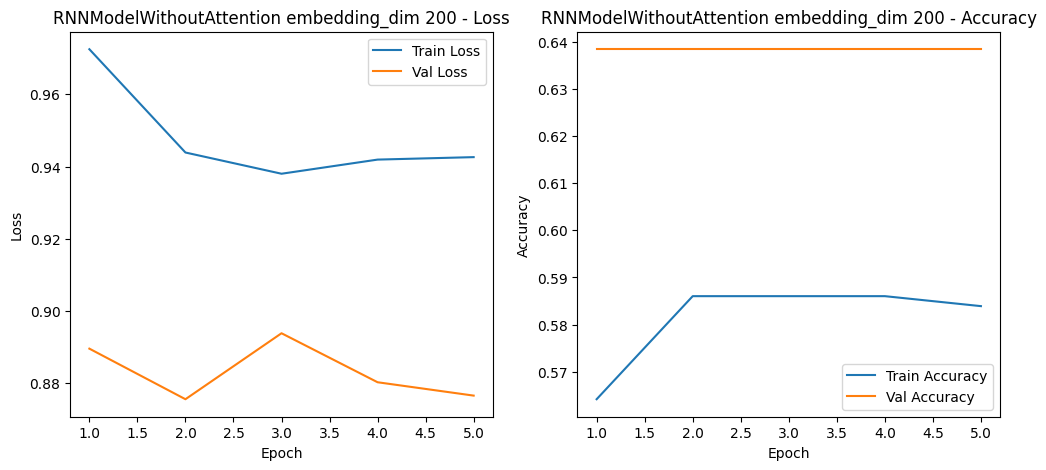

train_loss: [0.941054826312595, 0.9065298544036018, 0.9205807540151808, 0.9070946799384223, 0.9035192635324266]
val_loss: [0.8877477745215098, 0.8911335468292236, 0.8939425647258759, 0.8842586874961853, 0.8838193615277609]
train_acc: [0.5902679830747531, 0.6043723554301833, 0.6008462623413258, 0.6015514809590973, 0.6057827926657263]
val_acc: [0.5932203389830508, 0.5988700564971752, 0.5988700564971752, 0.5932203389830508, 0.5988700564971752]


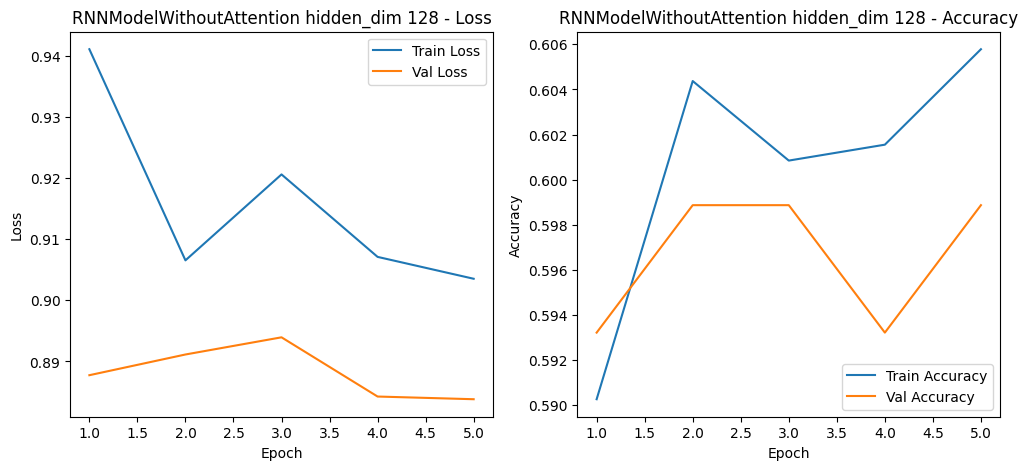

train_loss: [0.971379115846422, 0.9451446784867181, 0.9384349213706122, 0.9417556087176006, 0.9361491587426928]
val_loss: [0.9342600703239441, 0.9351119895776113, 0.9301494459311167, 0.9367442528406779, 0.928954561551412]
train_acc: [0.5458392101551481, 0.5895627644569816, 0.5860366713681241, 0.5902679830747531, 0.5923836389280677]
val_acc: [0.5819209039548022, 0.5988700564971752, 0.5819209039548022, 0.5819209039548022, 0.5819209039548022]


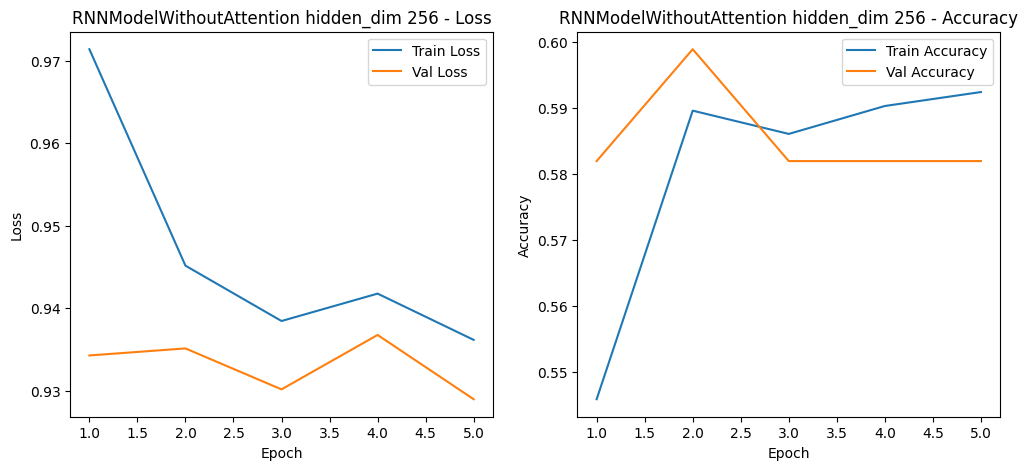

train_loss: [0.949468211332957, 0.9127295613288879, 0.9185324562920465, 0.9101965771781073, 0.9103337976667616]
val_loss: [0.8844136794408163, 0.8667070468266805, 0.8750978310902914, 0.8755179047584534, 0.8818769057591757]
train_acc: [0.5930888575458392, 0.607898448519041, 0.6029619181946403, 0.607898448519041, 0.607898448519041]
val_acc: [0.6497175141242938, 0.6497175141242938, 0.6497175141242938, 0.6497175141242938, 0.6497175141242938]


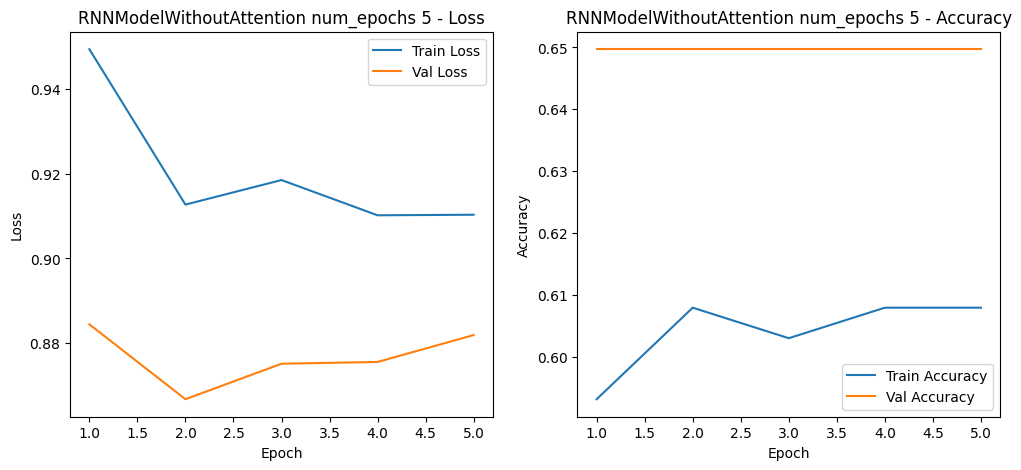

train_loss: [0.9400489648183187, 0.928957646422916, 0.9200455599360996, 0.9132073044776916, 0.9150046189626058, 0.9199219200346205, 0.907230552037557, 0.9110281268755595, 0.9107054657406277, 0.9078452640109592]
val_loss: [0.9595954318841299, 0.9577372769514719, 0.9496336181958517, 0.9647646645704905, 0.9571879406770071, 0.9514906704425812, 0.959166556596756, 0.9546419382095337, 0.95613561073939, 0.9548047582308451]
train_acc: [0.576163610719323, 0.6036671368124118, 0.6036671368124118, 0.6036671368124118, 0.6043723554301833, 0.6036671368124118, 0.6036671368124118, 0.6043723554301833, 0.6043723554301833, 0.6043723554301833]
val_acc: [0.576271186440678, 0.5932203389830508, 0.5932203389830508, 0.5932203389830508, 0.5932203389830508, 0.5932203389830508, 0.5932203389830508, 0.5932203389830508, 0.5932203389830508, 0.5932203389830508]


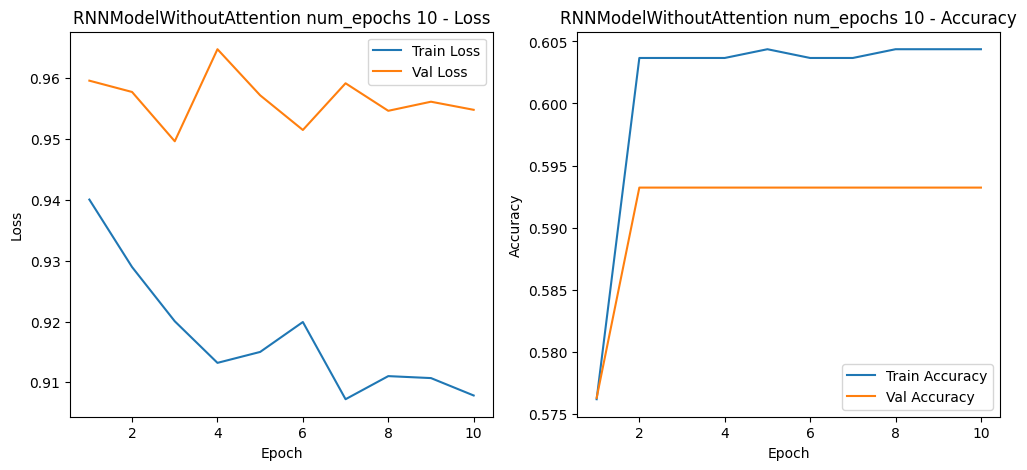

train_loss: [0.9720526814460755, 0.9379564934306674, 0.9381906217998929, 0.939681351184845, 0.9350227051311069]
val_loss: [0.8963158428668976, 0.892891009648641, 0.8838128248850504, 0.8843483825524648, 0.8831595281759897]
train_acc: [0.5416078984485191, 0.5782792665726375, 0.578984485190409, 0.5754583921015515, 0.577574047954866]
val_acc: [0.632768361581921, 0.6384180790960452, 0.632768361581921, 0.632768361581921, 0.6384180790960452]


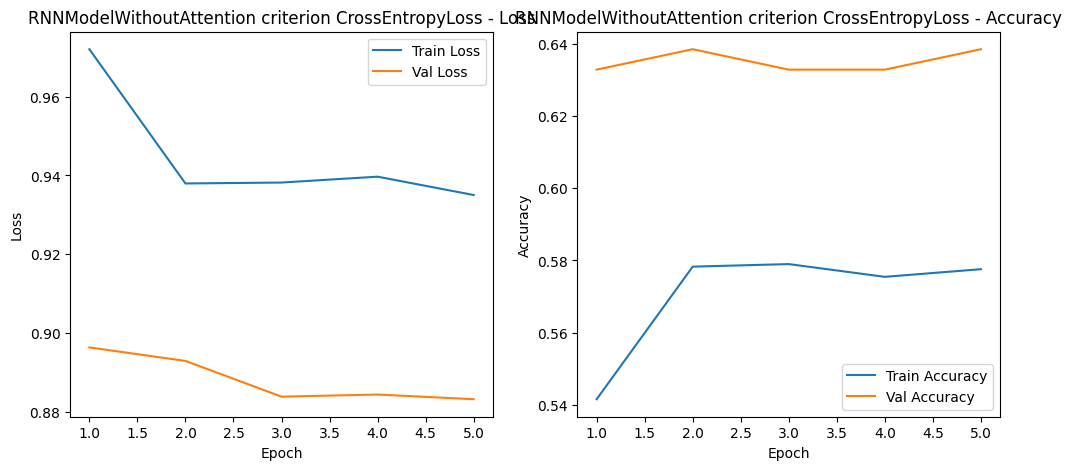

train_loss: [0.9424361639552646, 0.9250455260276794, 0.919157514307234, 0.9162176383866204, 0.9145839015642802]
val_loss: [0.8976116677125295, 0.8908963104089102, 0.8933776716391245, 0.8915965557098389, 0.9006988406181335]
train_acc: [0.5874471086036671, 0.5944992947813822, 0.5994358251057827, 0.5973201692524682, 0.5994358251057827]
val_acc: [0.6214689265536724, 0.6214689265536724, 0.6214689265536724, 0.6214689265536724, 0.6214689265536724]


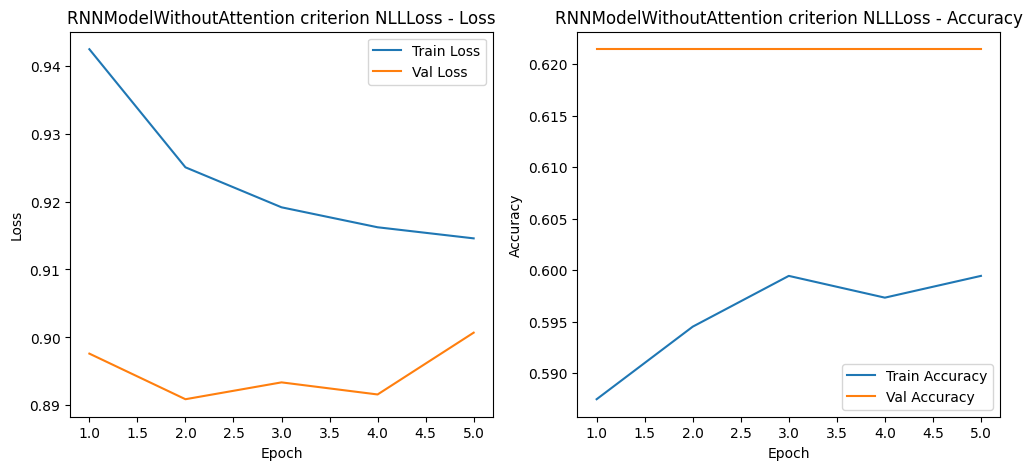

train_loss: [1.003478009170956, 0.9488519218232897, 0.9432318343056573, 0.9436097621917725, 0.944407872358958]
val_loss: [0.9137903253237406, 0.8888150453567505, 0.8796572585900625, 0.9050128062566122, 0.8927303353945414]
train_acc: [0.5535966149506347, 0.578984485190409, 0.5811001410437235, 0.580394922425952, 0.5832157968970381]
val_acc: [0.615819209039548, 0.615819209039548, 0.615819209039548, 0.615819209039548, 0.6214689265536724]


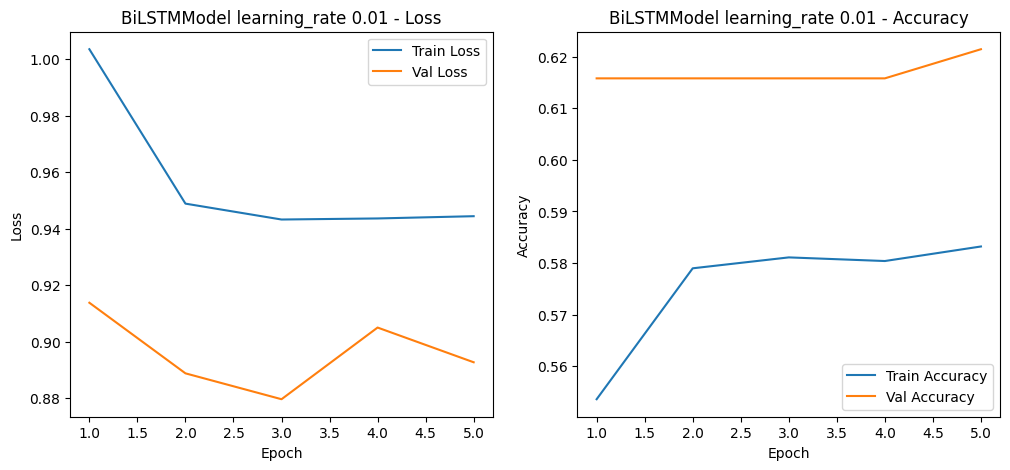

train_loss: [0.9656979189978705, 0.9351175520155165, 0.9320468836360507, 0.9294144153594971, 0.9259063786930508]
val_loss: [0.9630722999572754, 0.9565830032030741, 0.9609306553999583, 0.9551397562026978, 0.9552849332491556]
train_acc: [0.580394922425952, 0.5987306064880112, 0.5987306064880112, 0.5987306064880112, 0.5994358251057827]
val_acc: [0.576271186440678, 0.576271186440678, 0.576271186440678, 0.576271186440678, 0.576271186440678]


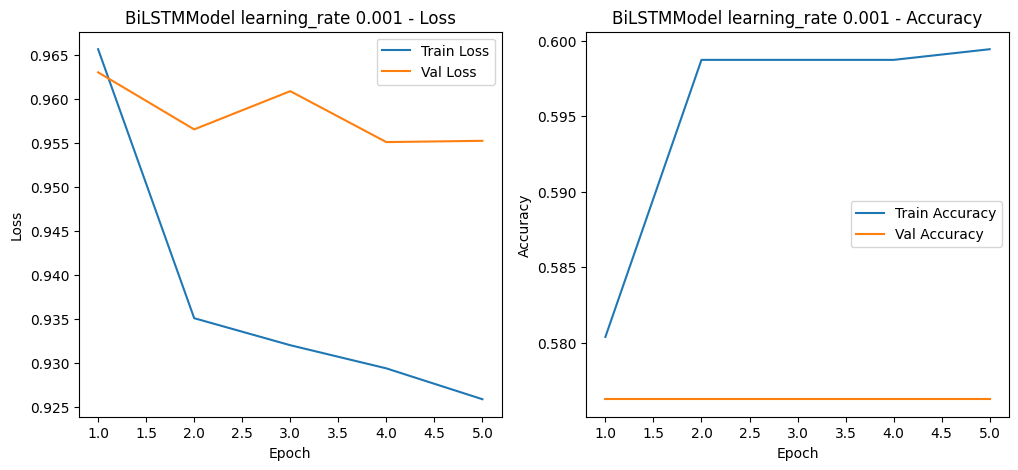

train_loss: [1.0156557493739657, 0.9429528964890375, 0.9326236208279928, 0.9309824413723415, 0.9294254978497823]
val_loss: [0.9214195112387339, 0.9066006342569987, 0.9073487718900045, 0.9011233548323313, 0.9057410558064779]
train_acc: [0.5345557122708039, 0.5768688293370945, 0.5825105782792666, 0.5832157968970381, 0.5846262341325811]
val_acc: [0.5875706214689266, 0.5988700564971752, 0.5988700564971752, 0.615819209039548, 0.615819209039548]


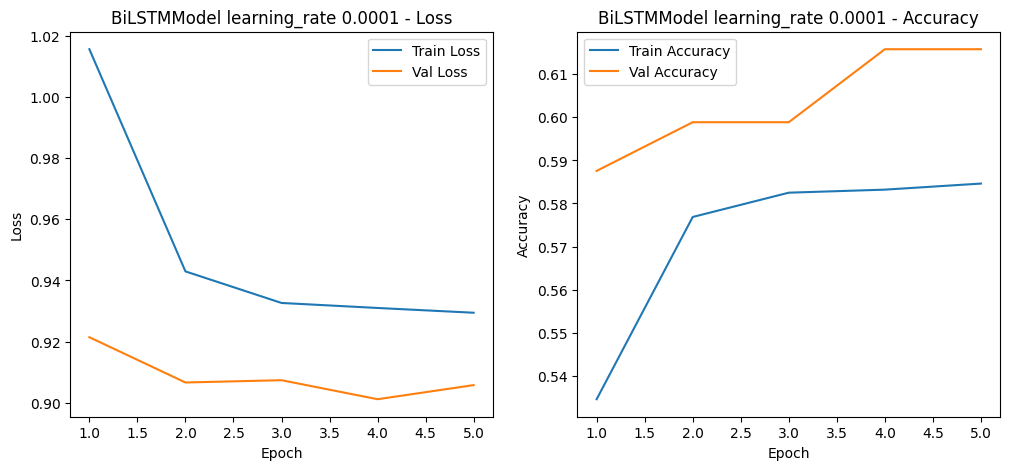

train_loss: [0.9660994847615559, 0.9407641609509786, 0.9388811733987596, 0.9370741632249621, 0.9285406907399495]
val_loss: [0.9233177701632181, 0.9263389408588409, 0.9221851329008738, 0.9201836287975311, 0.9276058673858643]
train_acc: [0.5691114245416079, 0.5839210155148096, 0.5881523272214386, 0.5881523272214386, 0.5881523272214386]
val_acc: [0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752]


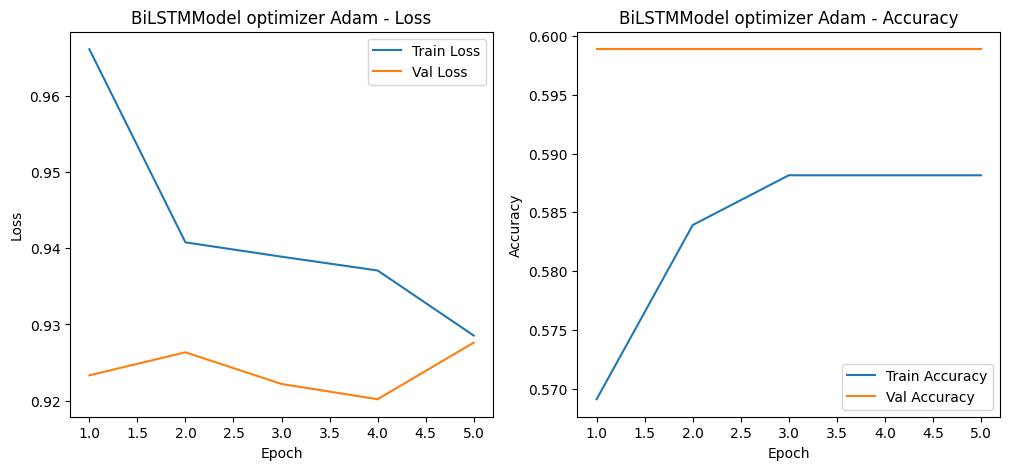

train_loss: [1.097928770383199, 1.0944696532355414, 1.0912697447670832, 1.0879793961842854, 1.0847944180170694]
val_loss: [1.104464550813039, 1.1016758879025776, 1.0990163683891296, 1.0964278380076091, 1.0938953558603923]
train_acc: [0.31170662905500707, 0.31170662905500707, 0.31170662905500707, 0.4322990126939351, 0.4633286318758815]
val_acc: [0.2768361581920904, 0.2768361581920904, 0.2768361581920904, 0.4011299435028249, 0.4011299435028249]


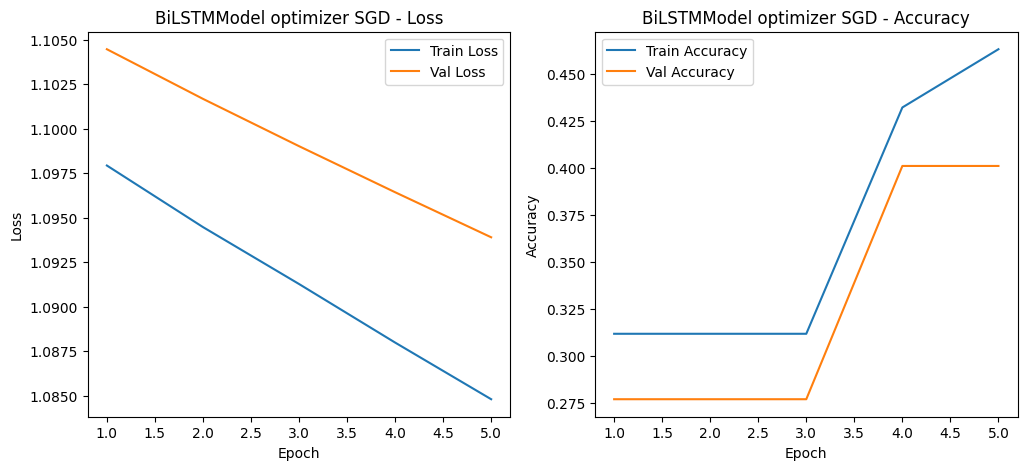

train_loss: [0.9591630074712966, 0.9465558528900146, 0.9427750600708855, 0.9330628130171034, 0.9365269144376119]
val_loss: [0.886404405037562, 0.883199026187261, 0.886712521314621, 0.8805231253306071, 0.8945227166016897]
train_acc: [0.5634696755994358, 0.577574047954866, 0.5726375176304654, 0.5825105782792666, 0.577574047954866]
val_acc: [0.6214689265536724, 0.632768361581921, 0.6214689265536724, 0.632768361581921, 0.632768361581921]


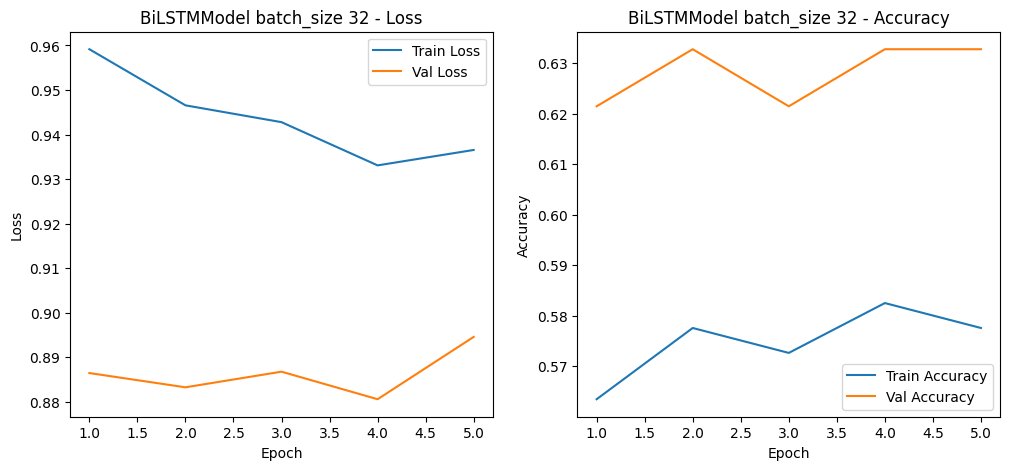

train_loss: [0.9456797682720682, 0.9137079378832942, 0.9029607228610826, 0.9161667227745056, 0.9126495744871057]
val_loss: [0.8887433807055155, 0.8888104756673177, 0.8828980724016825, 0.883611798286438, 0.8860190510749817]
train_acc: [0.5677009873060649, 0.5987306064880112, 0.6022566995768688, 0.6029619181946403, 0.6015514809590973]
val_acc: [0.6101694915254238, 0.6101694915254238, 0.6101694915254238, 0.6214689265536724, 0.6101694915254238]


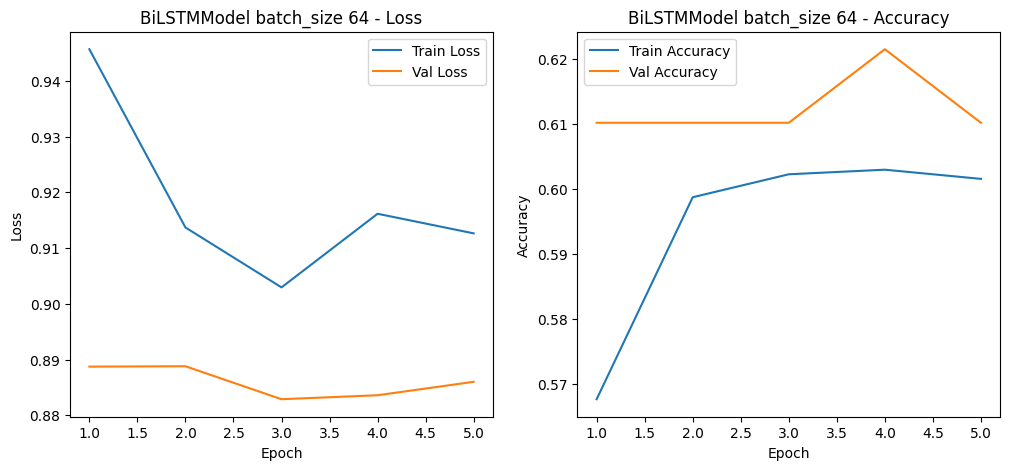

train_loss: [0.9740707887543573, 0.9438163876533509, 0.9392042093806796, 0.9378545615408156, 0.939416213830312]
val_loss: [0.9766881863276163, 0.9473135769367218, 0.9485513865947723, 0.9506224791208903, 0.9431847830613455]
train_acc: [0.5557122708039492, 0.5754583921015515, 0.576163610719323, 0.5768688293370945, 0.5754583921015515]
val_acc: [0.5423728813559322, 0.559322033898305, 0.559322033898305, 0.5423728813559322, 0.559322033898305]


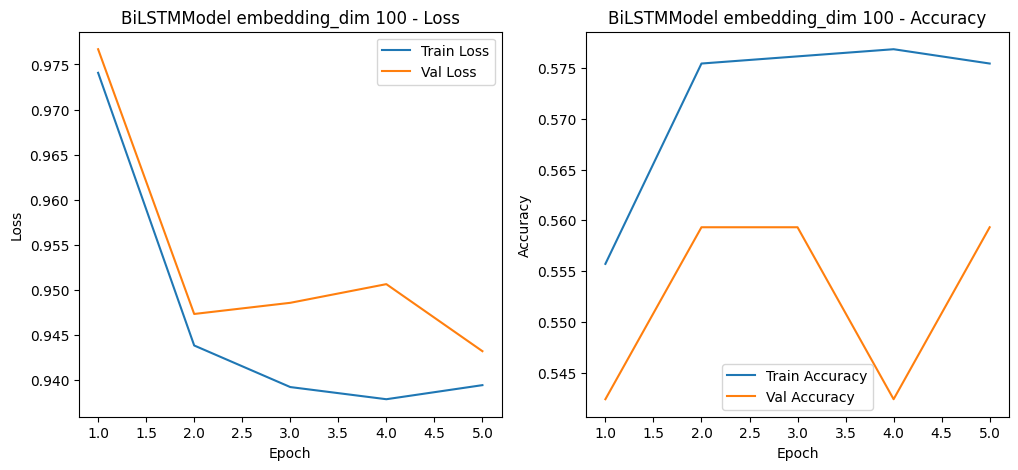

train_loss: [0.9324761986732483, 0.9154234528541565, 0.912180405192905, 0.9098743398984274, 0.9149050818549262]
val_loss: [0.848227302233378, 0.8804196417331696, 0.8631247282028198, 0.8688006500403086, 0.8573537071545919]
train_acc: [0.5888575458392101, 0.6043723554301833, 0.6071932299012694, 0.6071932299012694, 0.6071932299012694]
val_acc: [0.655367231638418, 0.6440677966101694, 0.6440677966101694, 0.6440677966101694, 0.6440677966101694]


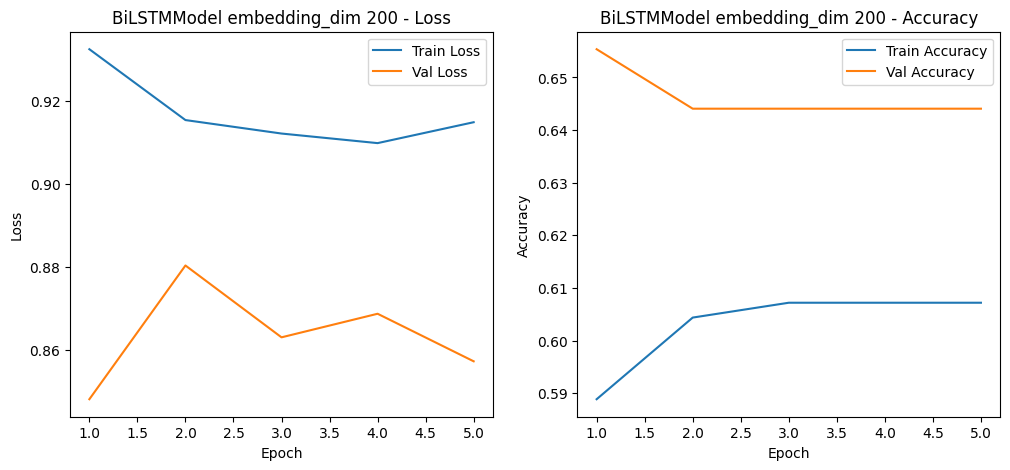

train_loss: [0.9521741204791598, 0.9151468012068007, 0.9109742535485161, 0.9083337028821309, 0.903671399752299]
val_loss: [0.8854473729928335, 0.9029350082079569, 0.9101457595825195, 0.9127345482508341, 0.9104841450850168]
train_acc: [0.580394922425952, 0.6100141043723555, 0.6086036671368125, 0.6114245416078985, 0.609308885754584]
val_acc: [0.6214689265536724, 0.6214689265536724, 0.6214689265536724, 0.6271186440677966, 0.6214689265536724]


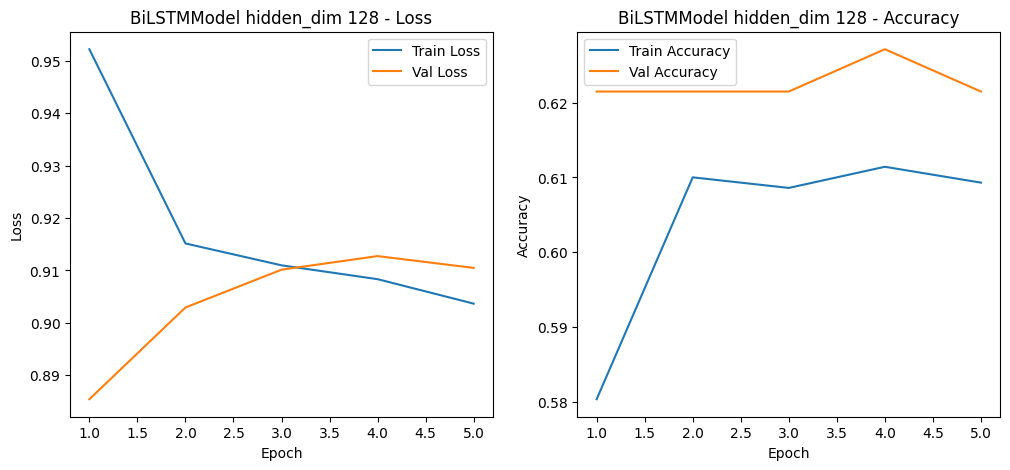

train_loss: [0.9574903474913703, 0.9459475517272949, 0.9395115349027846, 0.926444407304128, 0.933591984377967]
val_loss: [0.8623630205790201, 0.9241204162438711, 0.8975791931152344, 0.8814901014169058, 0.8979418476422628]
train_acc: [0.581805359661495, 0.5966149506346967, 0.5959097320169252, 0.5980253878702397, 0.5987306064880112]
val_acc: [0.6214689265536724, 0.6214689265536724, 0.6214689265536724, 0.6214689265536724, 0.6214689265536724]


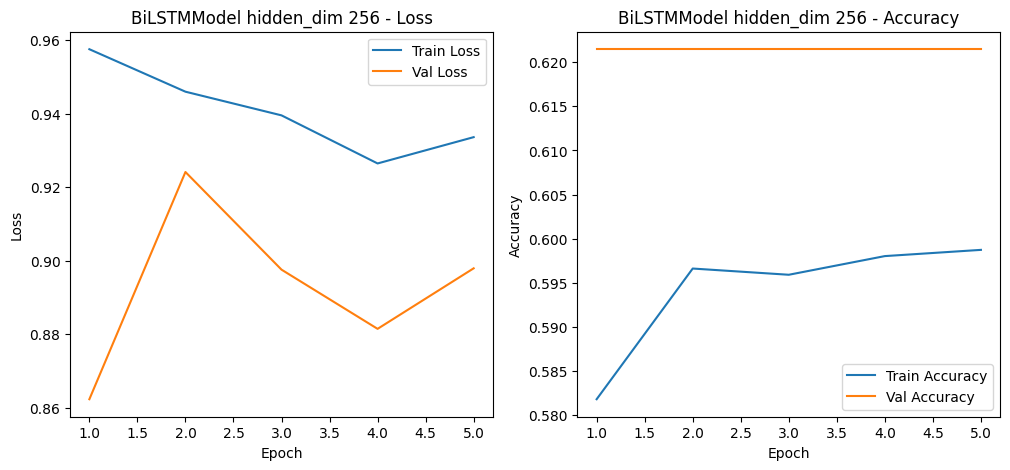

train_loss: [0.9658917519781325, 0.9371532095803154, 0.9327069944805569, 0.9452191869417826, 0.9330704026752048]
val_loss: [0.9533566931883494, 0.9260150889555613, 0.935917874177297, 0.935050904750824, 0.9329334994157156]
train_acc: [0.5599435825105783, 0.5768688293370945, 0.57475317348378, 0.580394922425952, 0.573342736248237]
val_acc: [0.559322033898305, 0.5649717514124294, 0.5649717514124294, 0.5649717514124294, 0.559322033898305]


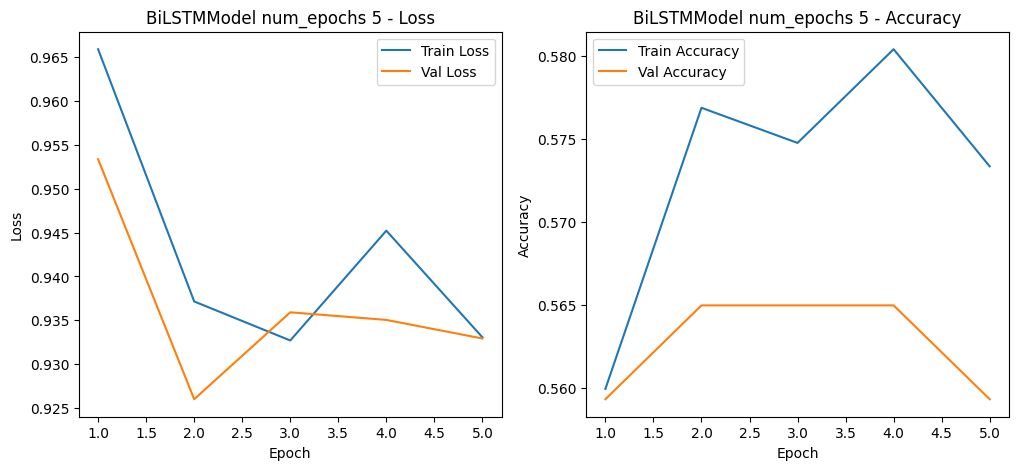

train_loss: [0.961492908000946, 0.9357959124777052, 0.9320482664638096, 0.9318674961725871, 0.9245791077613831, 0.9293492476145426, 0.9341444492340087, 0.9258122550116645, 0.9298068828052944, 0.9258330212699042]
val_loss: [0.9198908011118571, 0.9124805728594462, 0.9086593091487885, 0.9196259578069051, 0.9015354812145233, 0.9030695160230001, 0.9043014446894327, 0.9032837351163229, 0.9119135042031606, 0.9147508839766184]
train_acc: [0.57475317348378, 0.5952045133991537, 0.5952045133991537, 0.5952045133991537, 0.5952045133991537, 0.5952045133991537, 0.5952045133991537, 0.5952045133991537, 0.5952045133991537, 0.5952045133991537]
val_acc: [0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752, 0.5988700564971752]


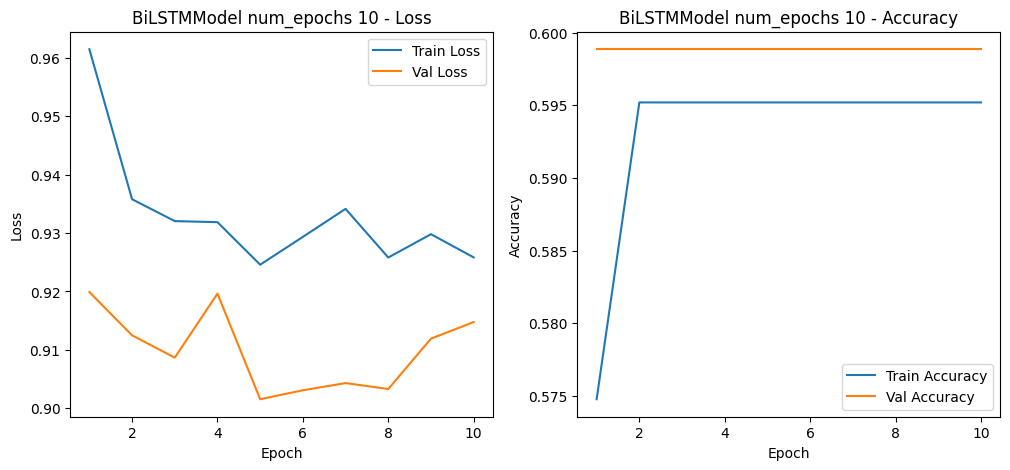

train_loss: [0.9717516726917691, 0.9395696626769172, 0.9416238983472188, 0.9390876160727607, 0.930395691924625]
val_loss: [0.8879265785217285, 0.8971026440461477, 0.877402146657308, 0.8934446175893148, 0.8719512522220612]
train_acc: [0.5486600846262342, 0.573342736248237, 0.5613540197461213, 0.5705218617771509, 0.573342736248237]
val_acc: [0.6214689265536724, 0.6214689265536724, 0.6214689265536724, 0.6214689265536724, 0.6214689265536724]


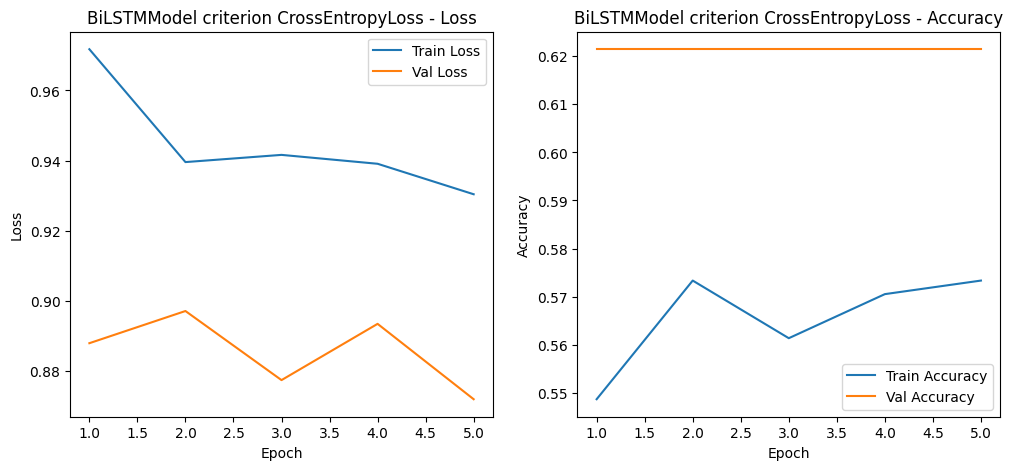

train_loss: [0.977746860186259, 0.9502015829086303, 0.9530035350057814, 0.9412162025769552, 0.9422265979978773]
val_loss: [0.9301604529221853, 0.9170682728290558, 0.9180102149645487, 0.9018145898977915, 0.9105518162250519]
train_acc: [0.5437235543018336, 0.573342736248237, 0.5719322990126939, 0.573342736248237, 0.5719322990126939]
val_acc: [0.6045197740112994, 0.6101694915254238, 0.6101694915254238, 0.6101694915254238, 0.6101694915254238]


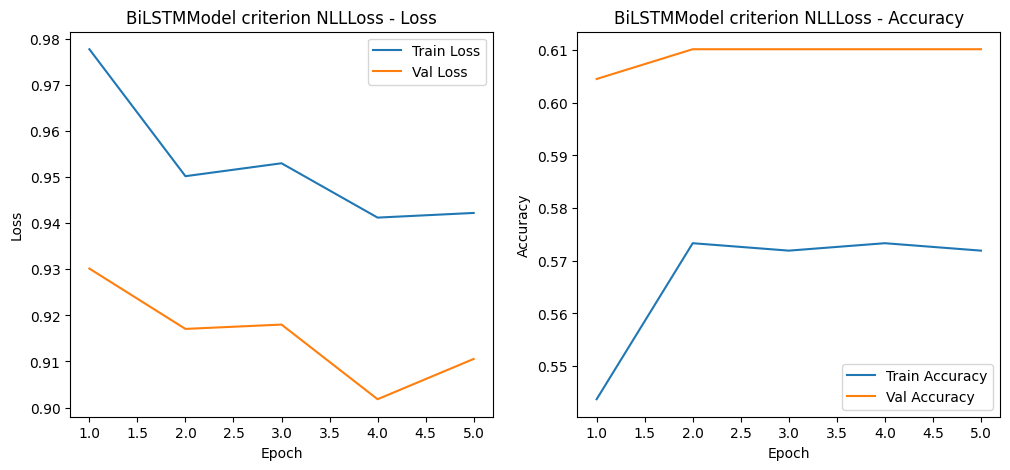

In [178]:
# Function to create and display line plots for results
def plot_results(results):
    for result in results:
        model_name = result['model']
        hyper_name = result['hyper_name']
        param = result[hyper_name]
        lr = result['learning_rate']
        opt = result['optimizer']
        num_epochs = result['num_epochs']
        batch_size = result['batch_size']
        criterion_name = result['criterion']
        embedding_dim = result['embedding_dim']
        hidden_dim = result['hidden_dim']

        # Ensure train_loss and train_acc are lists
        train_loss = [float(x) for x in result['train_loss']] if isinstance(result['train_loss'], list) else [float(result['train_loss'])]
        val_loss = [float(x) for x in result['val_loss']] if isinstance(result['val_loss'], list) else [float(result['val_loss'])]
        train_acc = [float(x) for x in result['train_acc']] if isinstance(result['train_acc'], list) else [float(result['train_acc'])]
        val_acc = [float(x) for x in result['val_acc']] if isinstance(result['val_acc'], list) else [float(result['val_acc'])]

        print(f"train_loss: {train_loss}")
        print(f"val_loss: {val_loss}")
        print(f"train_acc: {train_acc}")
        print(f"val_acc: {val_acc}")

        plt.figure(figsize=(12, 5))

        # Plotting loss graph
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
        plt.plot(range(1, len(val_loss) + 1), val_loss, label='Val Loss')
        plt.title(f'{model_name} {hyper_name} {param} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Plotting accuracy graph
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
        plt.plot(range(1, len(val_acc) + 1), val_acc, label='Val Accuracy')
        plt.title(f'{model_name} {hyper_name} {param} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

# Call the function to plot the results
plot_results(results)


RNNModelWithAttention:
  - Validation Accuracy: 0.60
  - Test Accuracy: 0.66
  - Validation Loss: 0.92
  - Test Loss: 0.81

RNNModelWithoutAttention:
  - Validation Accuracy: 0.64
  - Test Accuracy: 0.66
  - Validation Loss: 0.90
  - Test Loss: 0.83

BiLSTMModel:
  - Validation Accuracy: 0.62
  - Test Accuracy: 0.64
  - Validation Loss: 0.91
  - Test Loss: 0.85



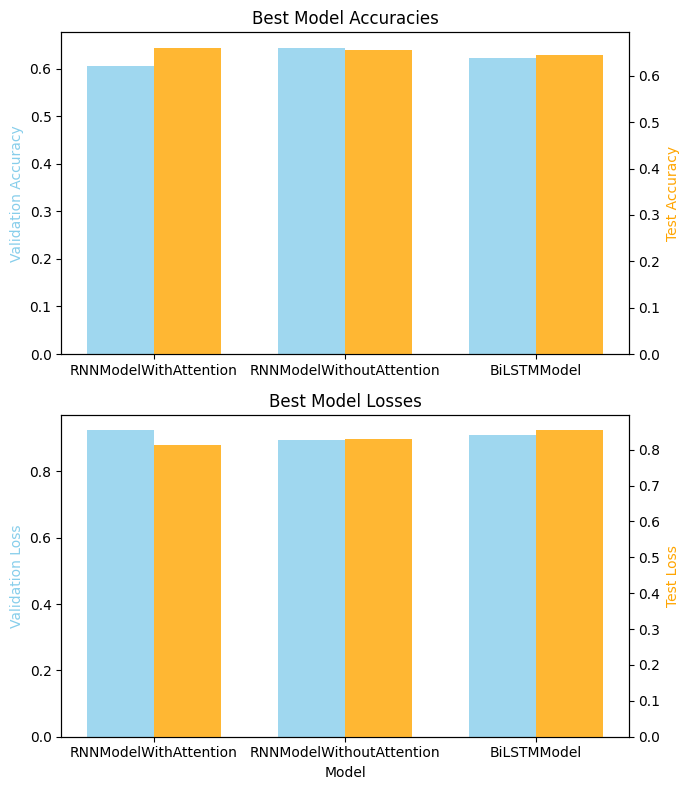

In [179]:
def plot_best_model_performance(results):
    # Determine the optimal performance for each model based on highest accuracy and lowest loss
    best_results = {}
    for result in results:
        model_name = result['model']
        if model_name not in best_results or best_results[model_name]['test_accuracy'] < result['test_accuracy']:
            best_results[model_name] = result

    # Prepare data for plotting
    models = list(best_results.keys())
    val_acc = [best_results[model]['val_acc'][-1] if isinstance(best_results[model]['val_acc'], list) else best_results[model]['val_acc'] for model in models]
    test_acc = [best_results[model]['test_accuracy'] for model in models]
    val_loss = [best_results[model]['val_loss'][-1] if isinstance(best_results[model]['val_loss'], list) else best_results[model]['val_loss'] for model in models]
    test_loss = [best_results[model]['test_loss'] for model in models]

    # Print the best parameters for each model
    for model in models:
        print(f"{model}:")
        print(f"  - Validation Accuracy: {best_results[model]['val_acc'][-1]:.2f}")
        print(f"  - Test Accuracy: {best_results[model]['test_accuracy']:.2f}")
        print(f"  - Validation Loss: {best_results[model]['val_loss'][-1]:.2f}")
        print(f"  - Test Loss: {best_results[model]['test_loss']:.2f}")
        print()

    # Set up the figure and axis objects
    fig, axes = plt.subplots(2, 1, figsize=(7, 8))

    # Plot for accuracy
    ax1 = axes[0]
    ax2 = ax1.twinx()
    bar_width = 0.35
    index = np.arange(len(models))

    ax1.bar(index, val_acc, bar_width, label='Validation Accuracy', color='skyblue', alpha=0.8)
    ax2.bar(index + bar_width, test_acc, bar_width, label='Test Accuracy', color='orange', alpha=0.8)

    ax1.set_ylabel('Validation Accuracy', color='skyblue')
    ax2.set_ylabel('Test Accuracy', color='orange')
    ax1.set_title('Best Model Accuracies')
    ax1.set_xticks(index + bar_width / 2)
    ax1.set_xticklabels(models)

    # Plot for loss
    ax3 = axes[1]
    ax4 = ax3.twinx()

    ax3.bar(index, val_loss, bar_width, color='skyblue', alpha=0.8)
    ax4.bar(index + bar_width, test_loss, bar_width, color='orange', alpha=0.8)

    ax3.set_xlabel('Model')
    ax3.set_ylabel('Validation Loss', color='skyblue')
    ax4.set_ylabel('Test Loss', color='orange')
    ax3.set_title('Best Model Losses')
    ax3.set_xticks(index + bar_width / 2)
    ax3.set_xticklabels(models)

    plt.tight_layout()
    plt.show()

plot_best_model_performance(results)
